# CMG Data processing workflow for field-scale $CO_2$ simulations
Author: Jose Ubillus

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import Rel_Perm_Generator as rpg
import batch_data_processing as bdp
from warnings import filterwarnings
import scienceplots

# Filter warnings
filterwarnings('ignore')
# Style
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'

# Change style to science plots
plt.style.use(['science','no-latex'])

## Relative Permeability and Capillary Pressure Curves

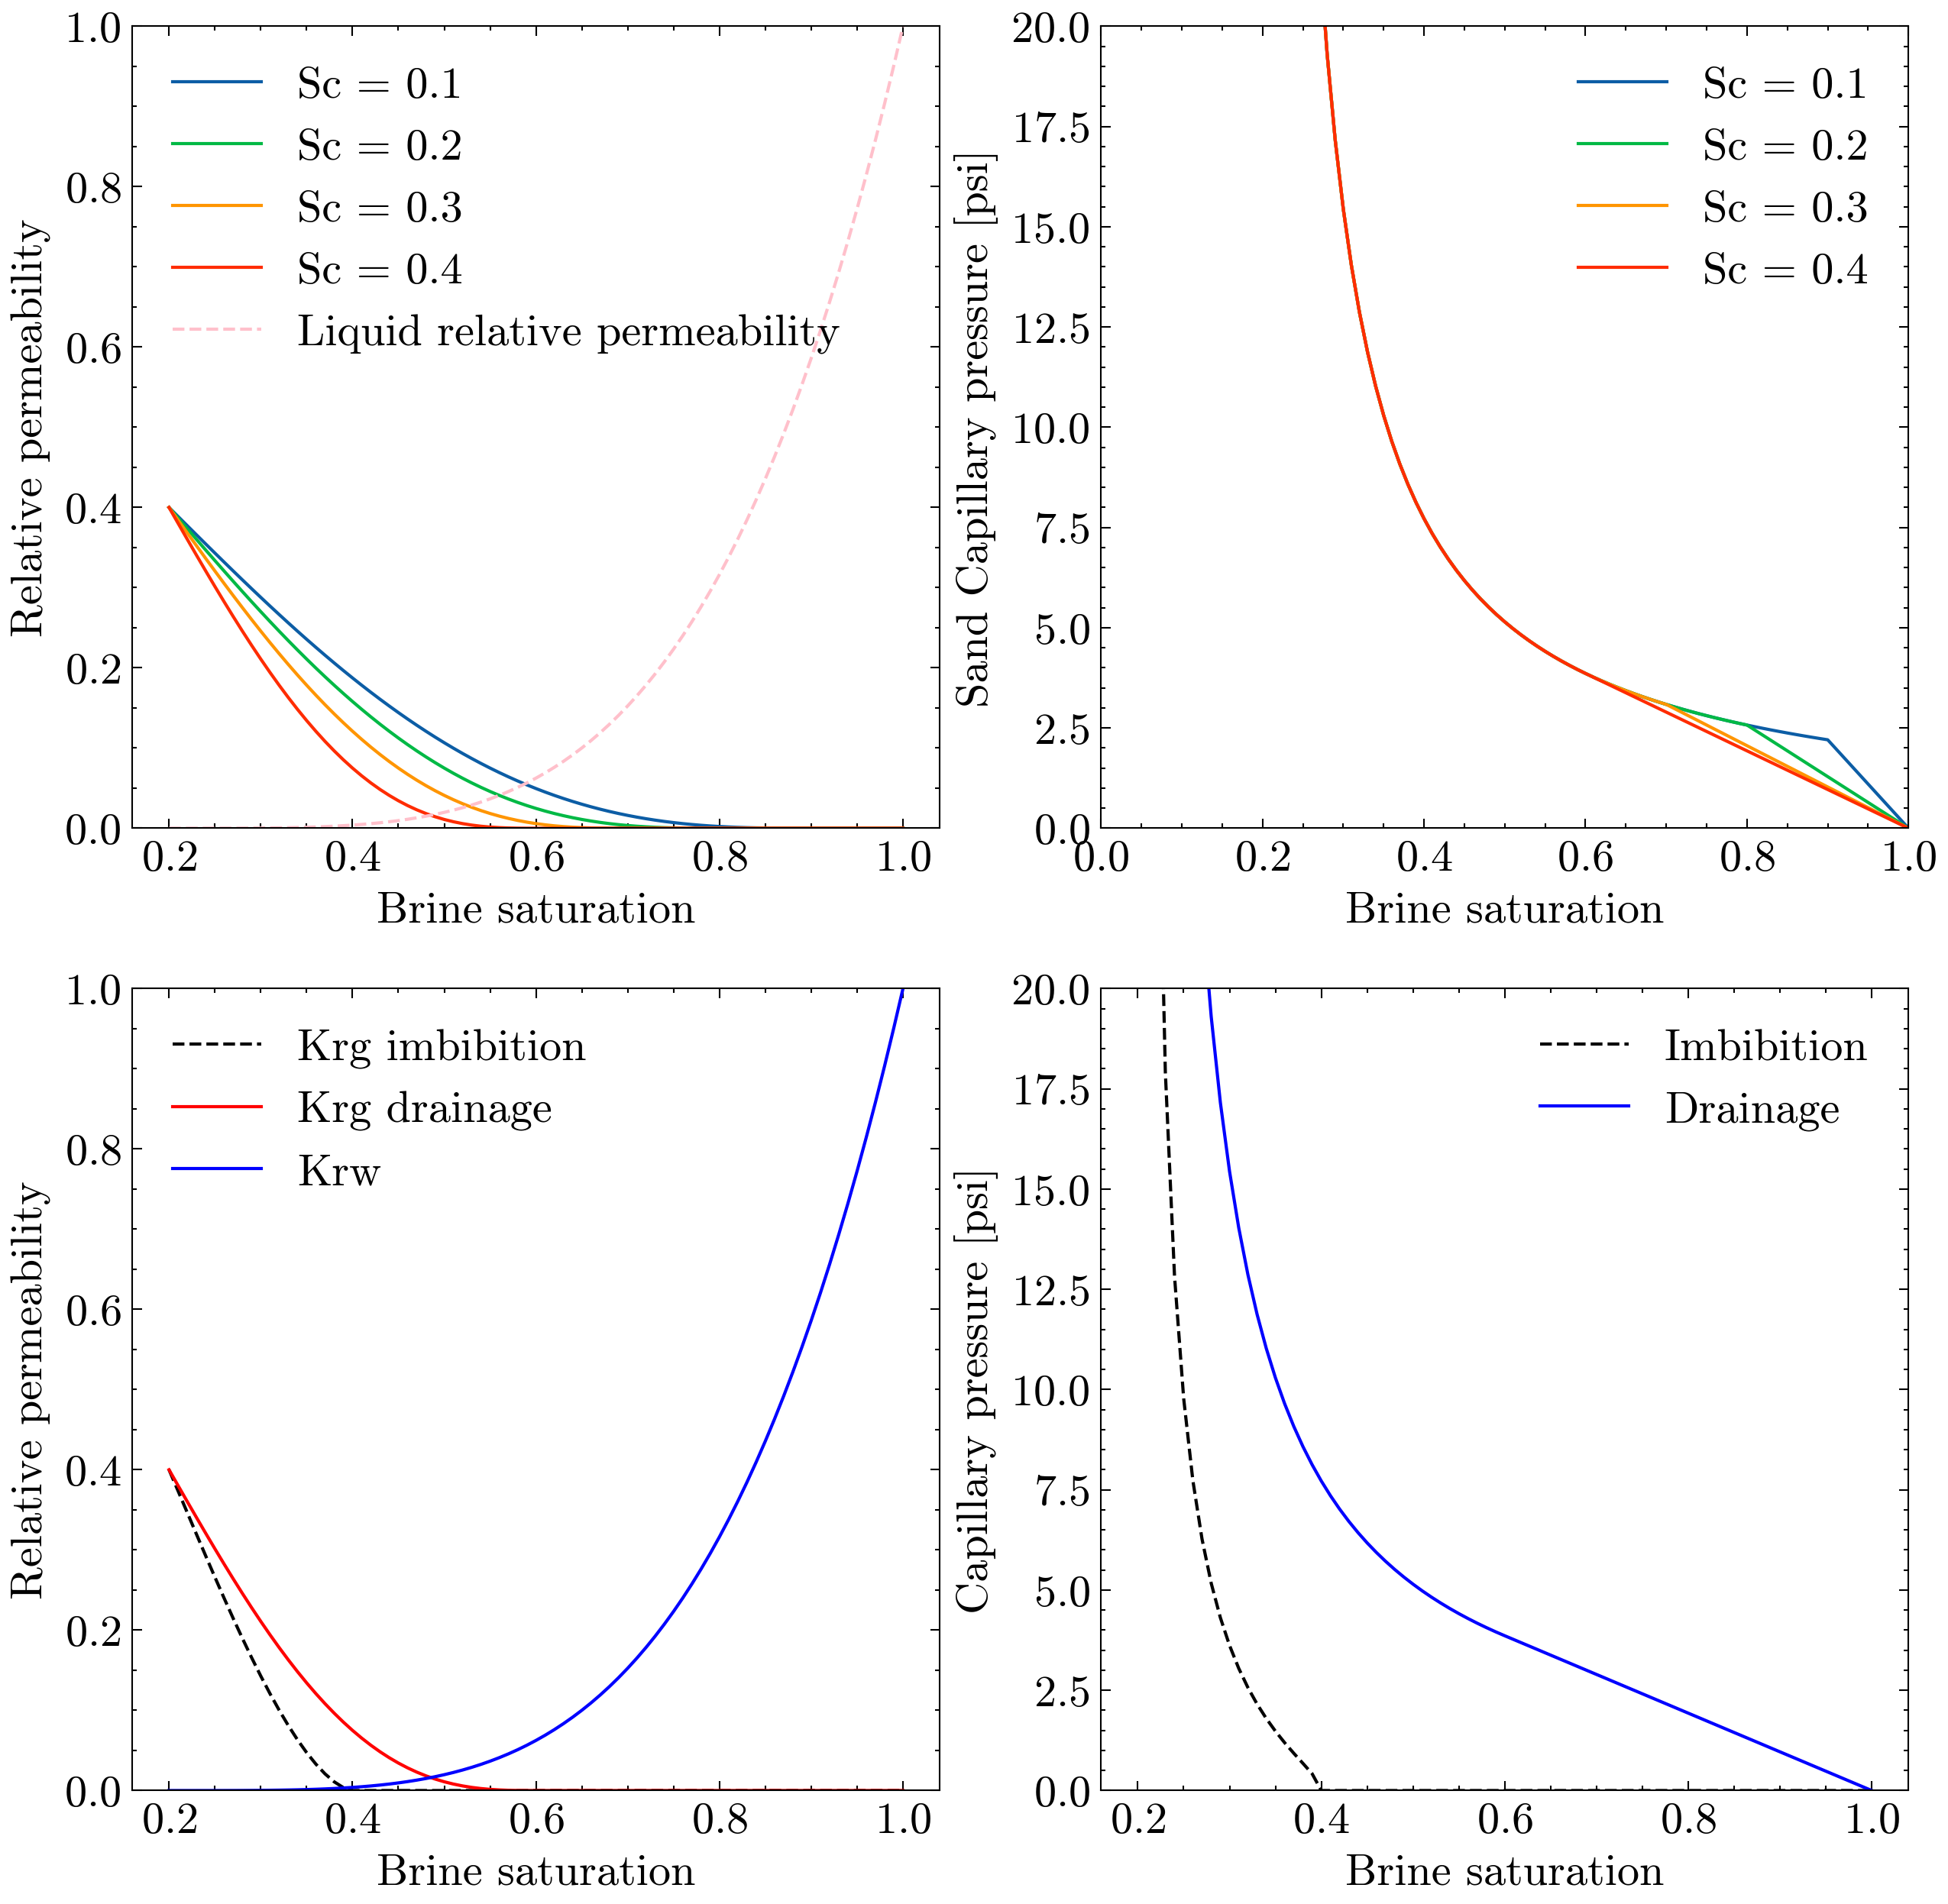

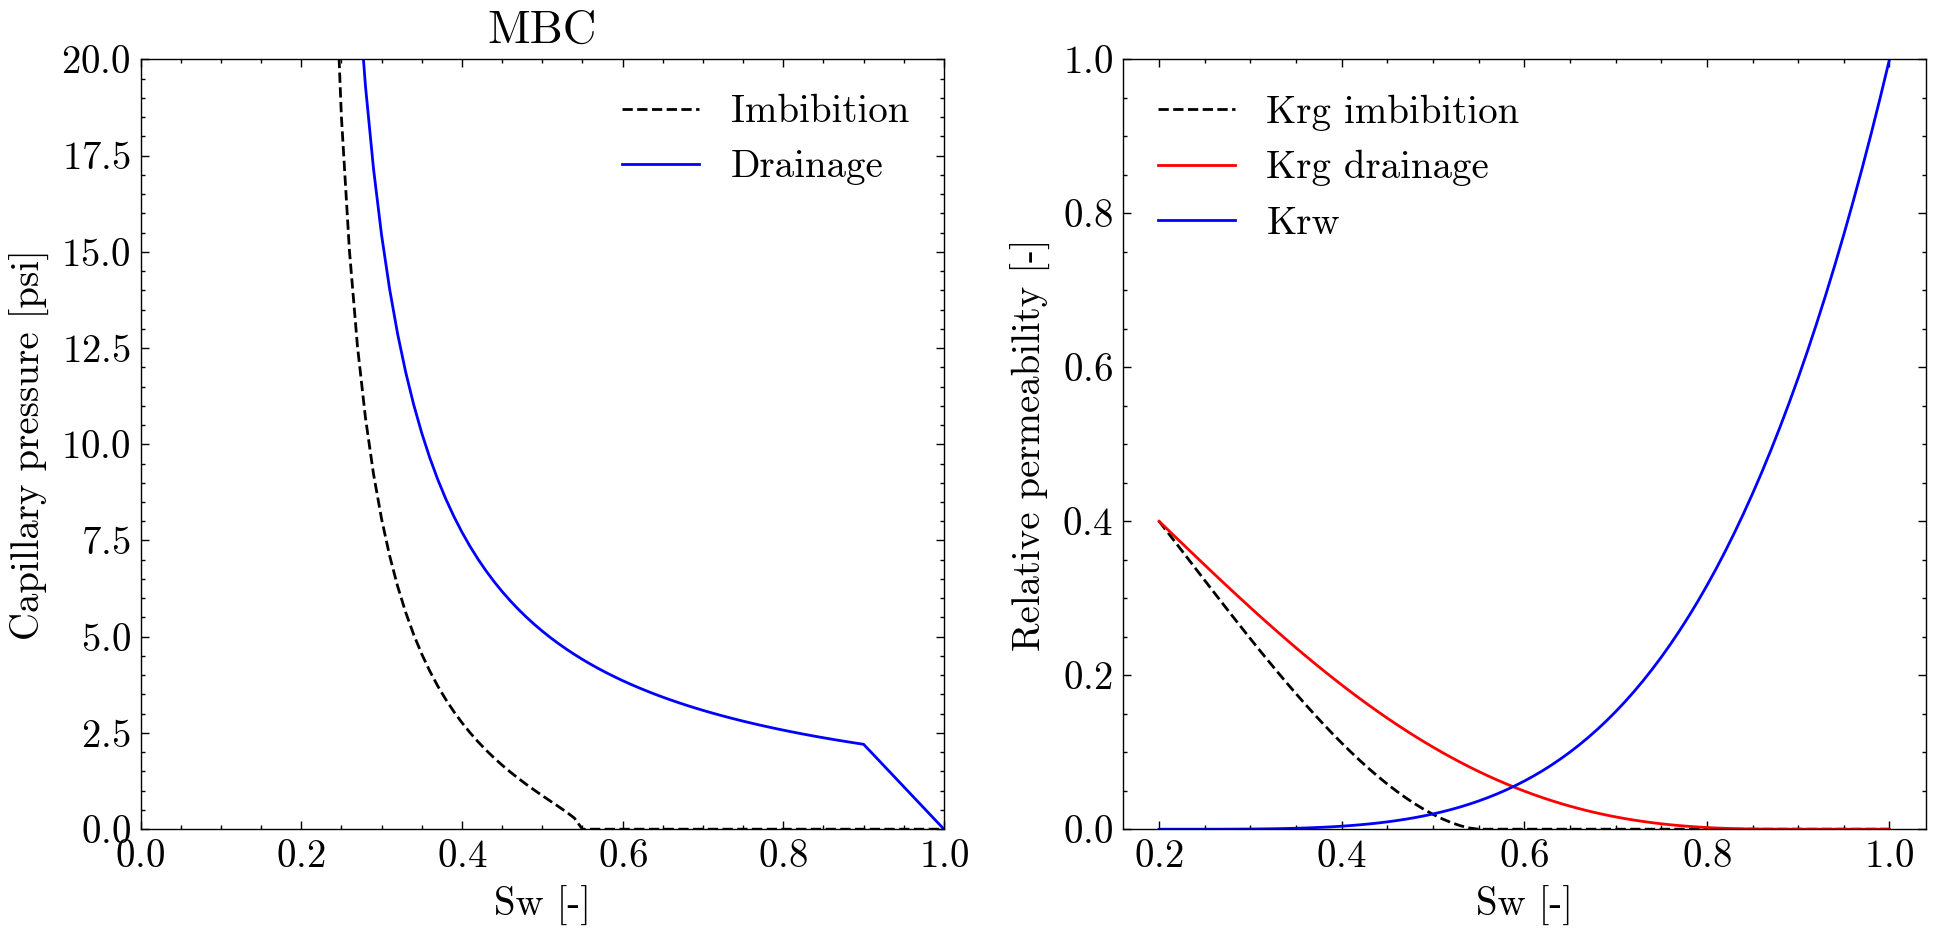

In [2]:
path  = 'C:/Users/ubillusj/Desktop/CMG/Ubillus_simulations/Simulations_Cap_Pres/BC' # Path to save the generated files
rpg.rel_perm_batch(path,0.1,0.4,cap_p_model='MBC',swi=0.2,pce_1=1.93,pce_2=2.14e3,kx_s=500,kx_sh=0.01,print_bool=False)

## Geological model and petrophysical parameters
This are the parameters that remain constant throughout the whole set of simulations

In [3]:
# Define the path for the data files 
path = 'C:/Users/ubillusj/Box/2022-2023 GRA/Simulation/CMG_Ubillus/Ubillus_simulations/hyskrg_midpoint/results_nokrg/'

# Read the data files using geobuilder function available in batch_data_processing.py
# The function returns a dictionary with the data for each simulation
rel_perm,x,z,shape = bdp.geo_builder(path,'S1/Het2D_nokrg Rel Perm Set Num 2018-Dec-01.gslib')
porosity,shape = bdp.list_to_array(path,'S1/Het2D_nokrg Porosity 2018-Dec-01.gslib')
perm, shape = bdp.list_to_array(path,'S1/Het2D_nokrg Permeability I 2018-Dec-01.gslib')
volume,shape = bdp.list_to_array(path,'S1/Het2D_nokrg Gross Block Volume 2018-Dec-01.gslib')

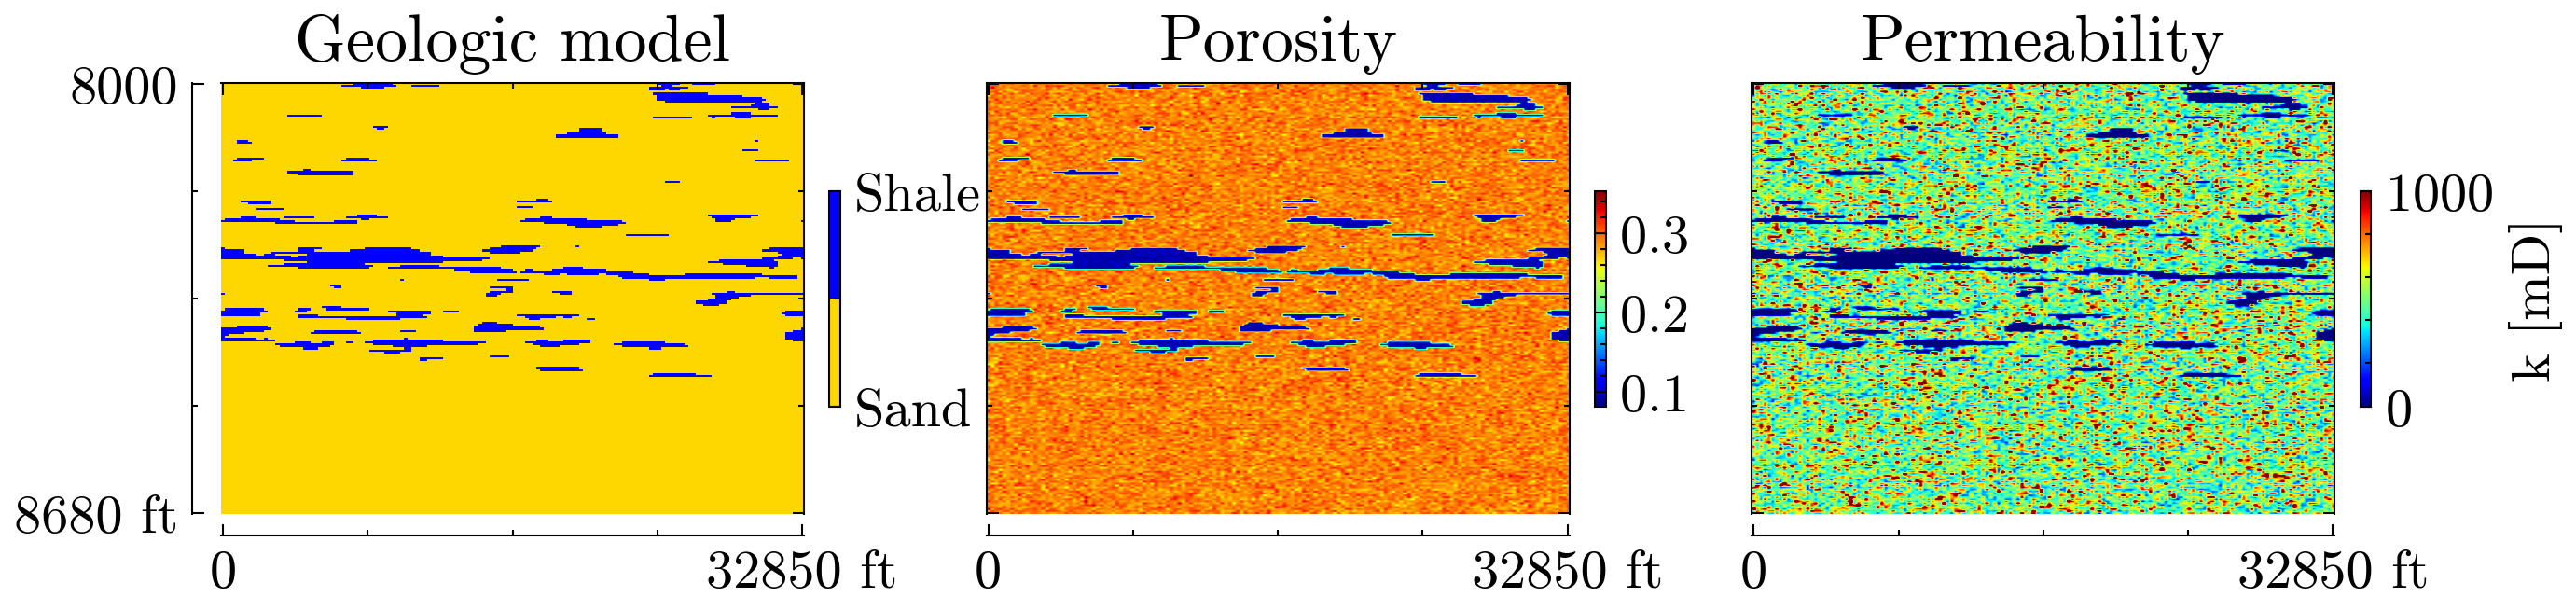

In [6]:
# Plot geological model and petrophysical properties
bdp.geo_properties(rel_perm,porosity,perm)

## First case: No hysteresis but including dissolution

In [4]:
gas_dict = {} ; p_dict = {} ; special_dict = {} # dictionaries that will store the different variable results for each simulation
size = 4 # defines the number of simulations run

for i in range(size):
    folder = 'S' + str(i+1)
    
    gas_dict[folder] = bdp.mul_list_to_array(path + folder,'/Het2D_nokrg Gas Saturation.gslib',shape,size=8)
    p_dict[folder] = bdp.mul_list_to_array(path + folder,'/Het2D_nokrg Pressure.gslib',shape,size=2)
    special_dict[folder] = bdp.special_table(path + folder,'/special.xlsx')

### Simulation results analysis
- Gas saturation vs depth.
- Residual and solubility trapping index, if present.
- Pressure profile
- Spatial Moment Analysis

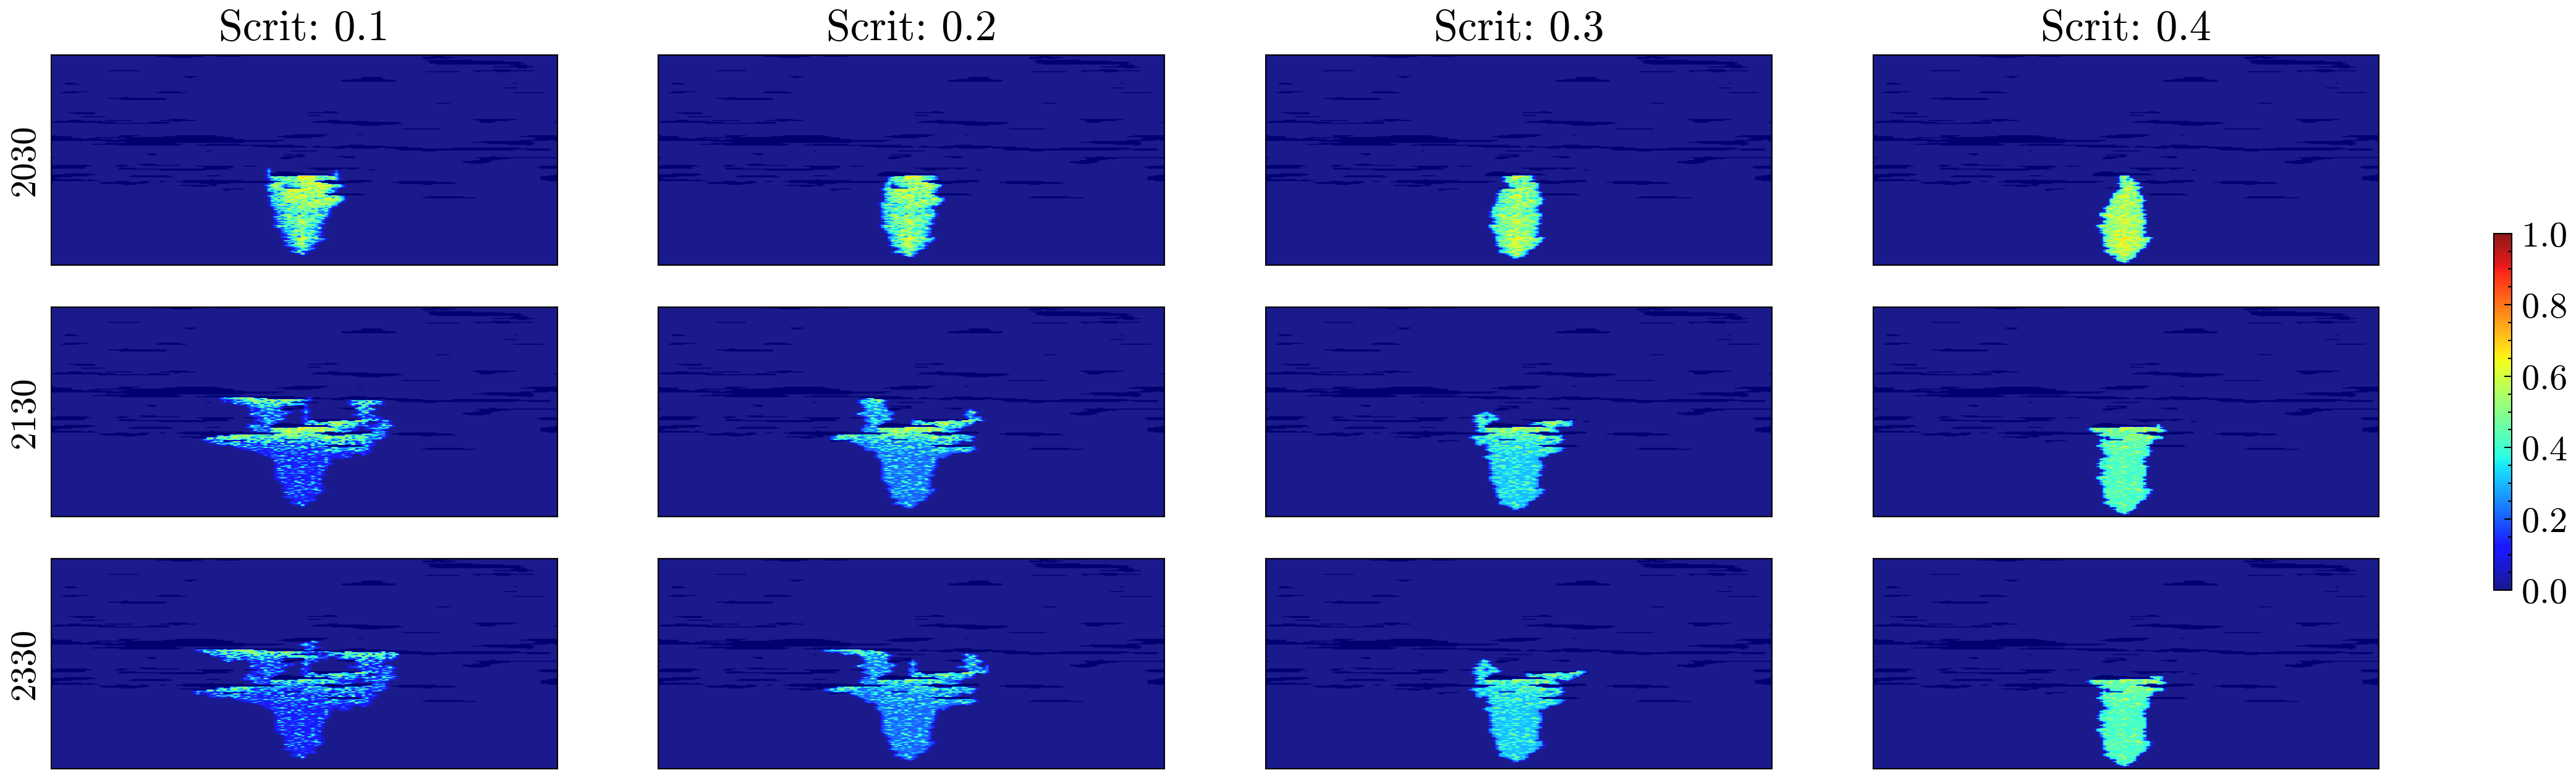

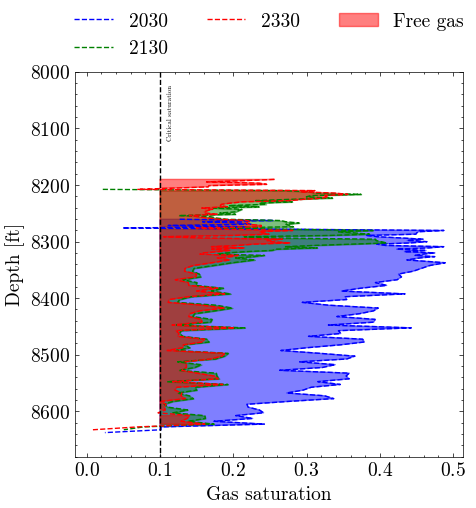

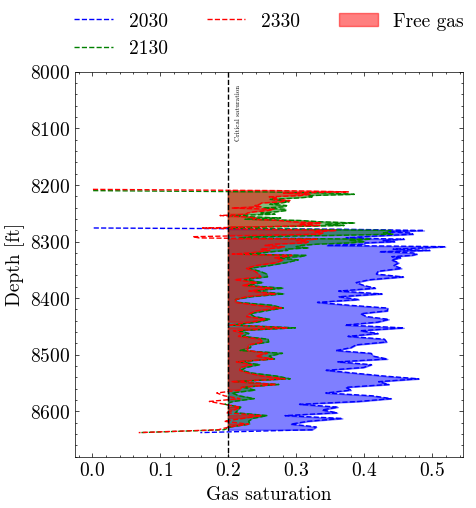

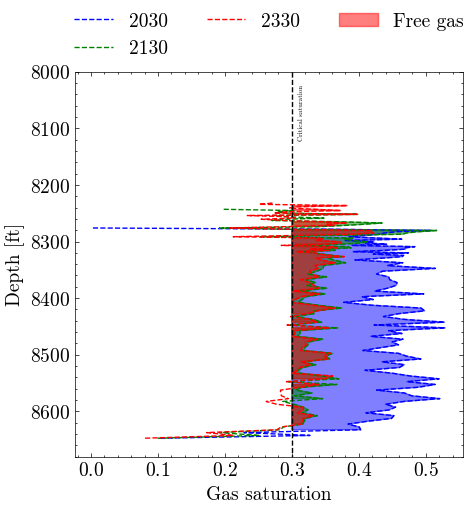

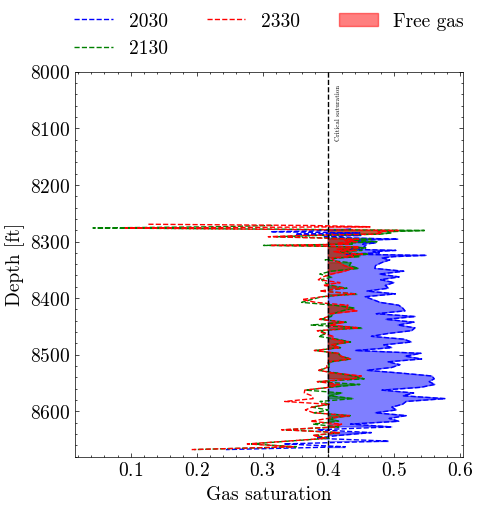

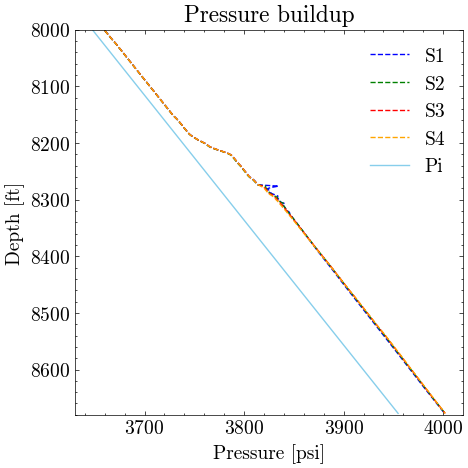

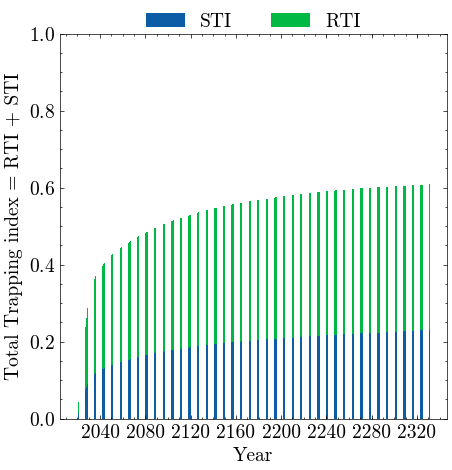

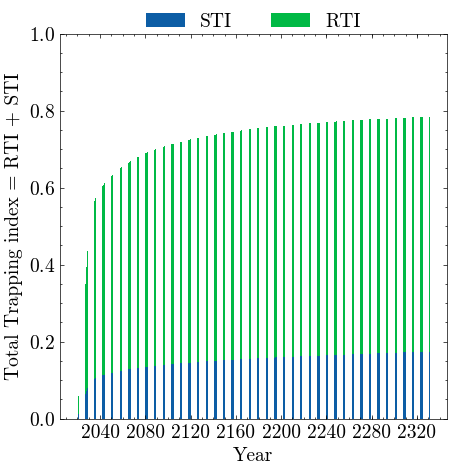

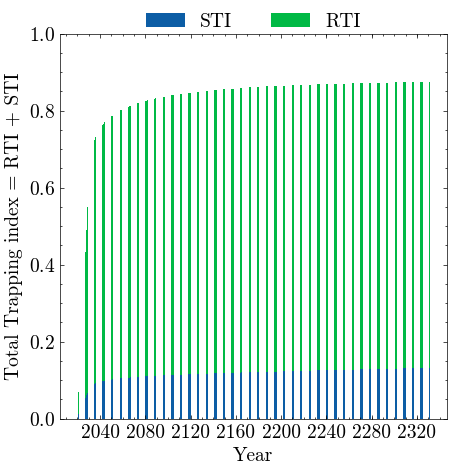

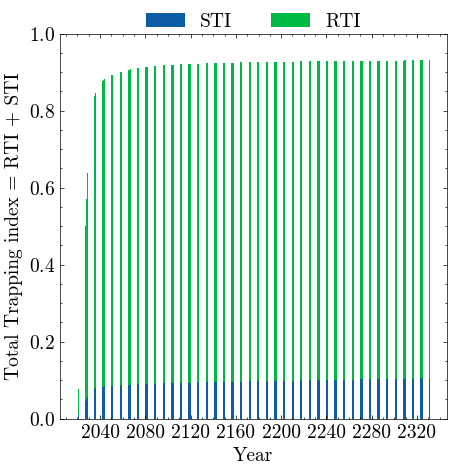

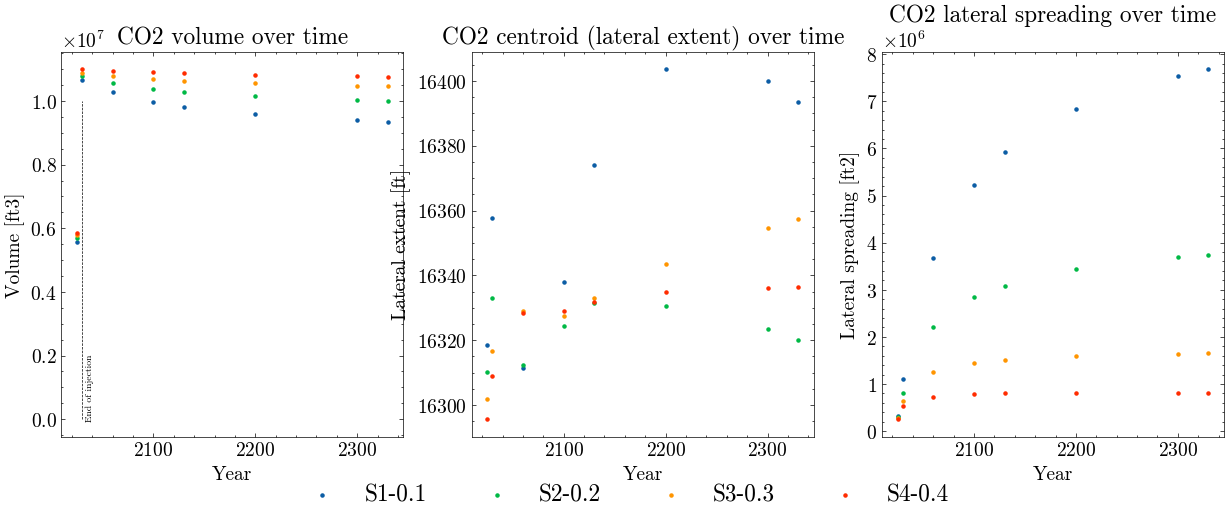

In [12]:
scrit = np.round(np.arange(0.1,0.5,0.1),2)
dates = [2025,2030,2060,2100,2130,2200,2300,2330]
colors = ['C0','C1','C2','C3'] #,'purple','brown','pink']

# Plot plume saturation over time all scenarios 
bdp.plot_plume(rel_perm, gas_dict,size=size)

# Saturation profiles for each scenario
for i in range(size):
    fig = bdp.saturation_profile(gas_dict[f'S{i+1}'],z,scrit[i])
    #fig.savefig(f'C:/Users/ubillusj/Desktop/CMG/Ubillus_simulations/hyskrg_midpoint/saturation_profile_{i+1}.png',dpi=300,pad_inches=0.2,bbox_inches='tight')

# Plot pressure buildup in different scenarios
bdp.plot_batch_pressure(p_dict,z,size)

# Calculate and plot trapping indexes
for i in range(size):
    idx = bdp.indexes(special_dict[f'S{i+1}']['Dissolved'],special_dict[f'S{i+1}']['Trapped'],special_dict[f'S{i+1}']['Super-critical'],4.83e9)
    fig = bdp.plot_indexes(special_dict[f'S{i+1}']['Date'],idx[0],idx[1])
    #fig.savefig(f'C:/Users/ubillusj/Desktop/CMG/Ubillus_simulations/hyskrg_midpoint/idx_{i+1}.png',dpi=300,pad_inches=0.2,bbox_inches='tight')

# Plot moments of the plume
mts_1 = bdp.batch_plot_moments(gas_dict,porosity,volume,x,z,dates,scrit,cl=colors)

## Second case: Hysteresis and dissolution included

In [5]:
# Load data from simulations
gas_dict_krg = {} ; p_dict_krg = {};trapped_dict = {}; special_dict_krg = {} # Define dictionaries to store the data
size = 4 # simulations run
path = 'C:/Users/ubillusj/Box/2022-2023 GRA/Simulation/CMG_Ubillus/Ubillus_simulations/hyskrg_midpoint/results_krg/'

for i in range(size):
    folder = 'S' + str(i+1)
    
    gas_dict_krg[folder] = bdp.mul_list_to_array(path + folder,'/Het2D_krg Gas Saturation.gslib',shape,size=8)
    trapped_dict[folder] = bdp.mul_list_to_array(path + folder,'/Het2D_krg Sg _ Sgc _ Hysteresis Dynamic trapped gas saturation.gslib',shape,size=8)
    p_dict_krg[folder] = bdp.mul_list_to_array(path + folder,'/Het2D_krg Pressure.gslib',shape,size=2)
    special_dict_krg[folder] = bdp.special_table(path + folder,'/special.xlsx')

### Simulation results analysis
- Gas saturation vs depth.
- Contribution of residual trapping to total trapping
- Pressure profile
- Residual and solubility trapping index, if present.
- Spatial Moment Analysis

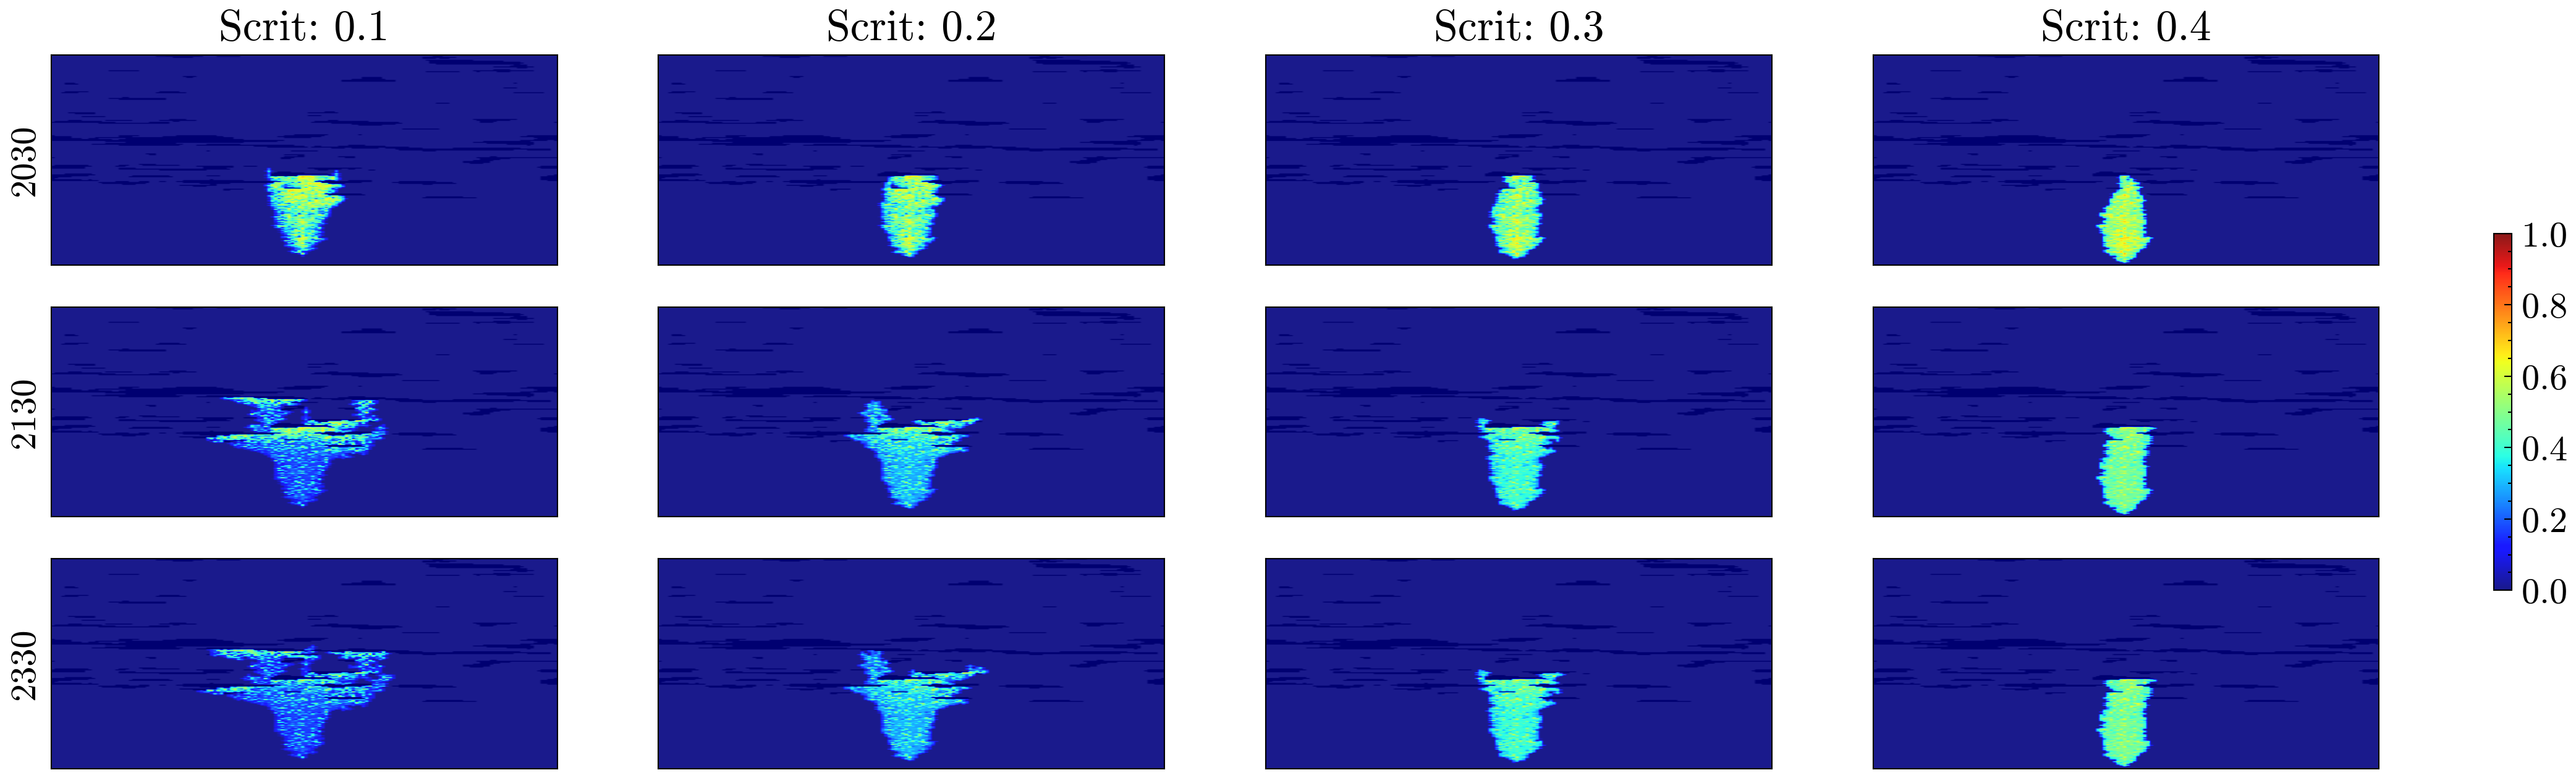

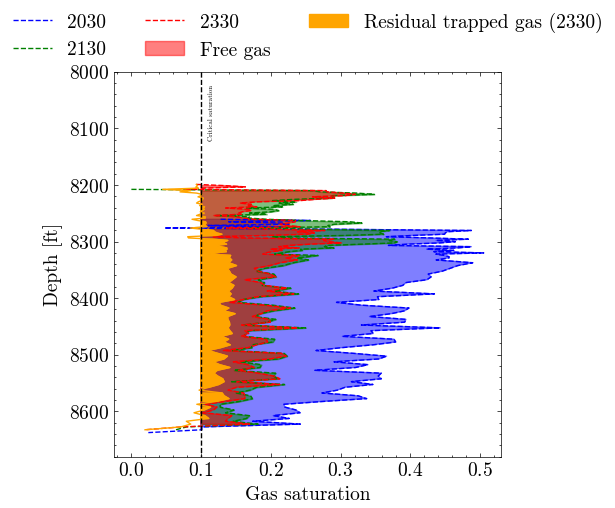

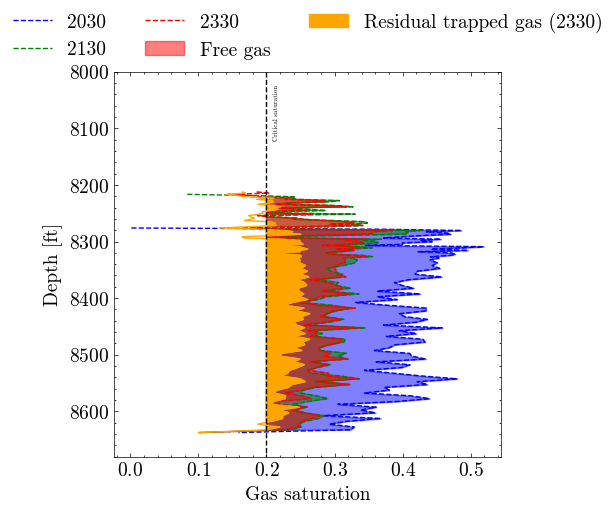

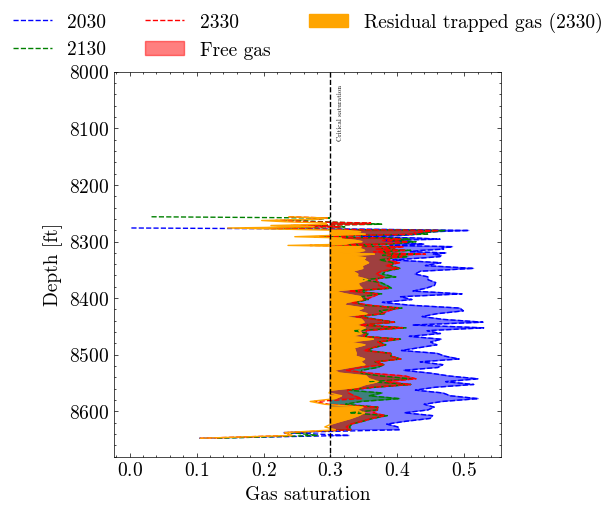

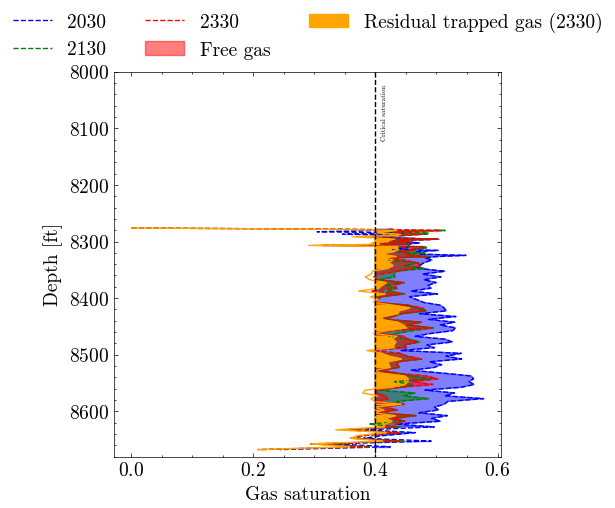

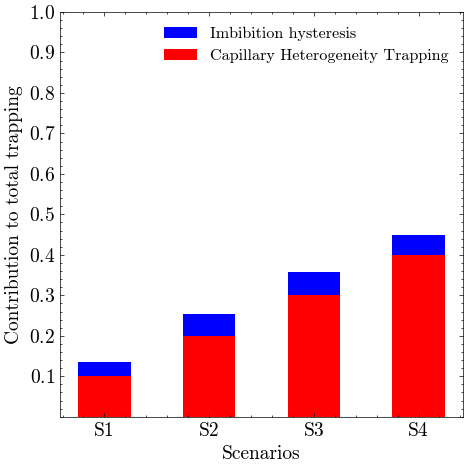

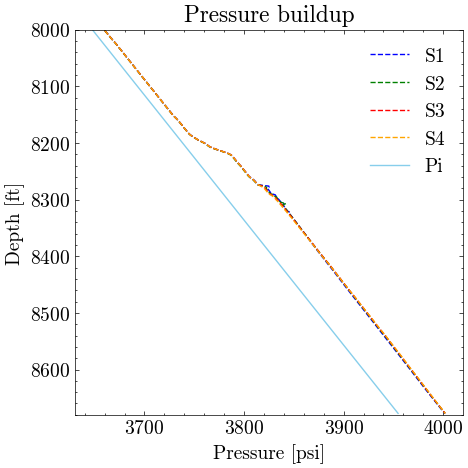

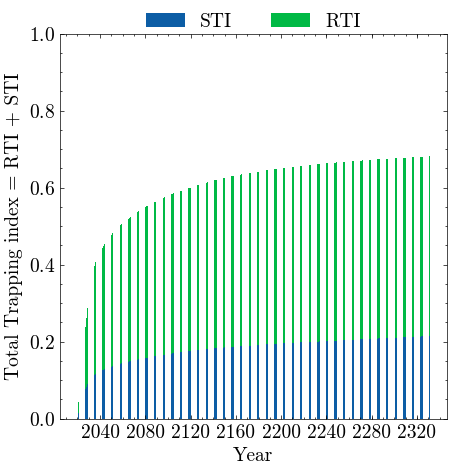

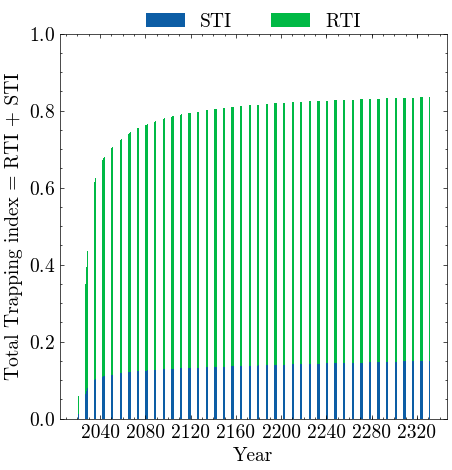

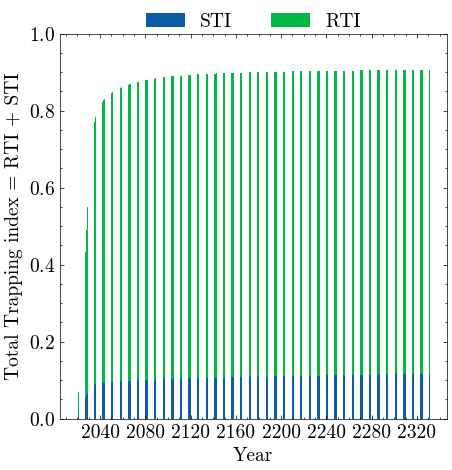

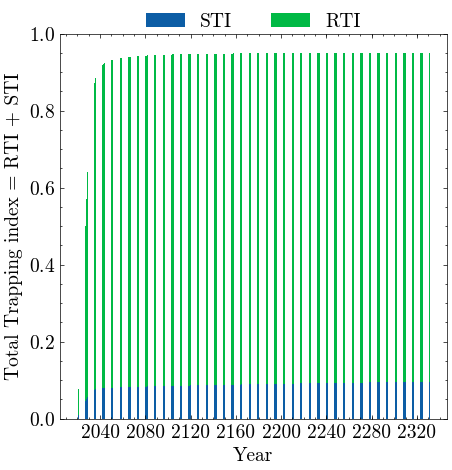

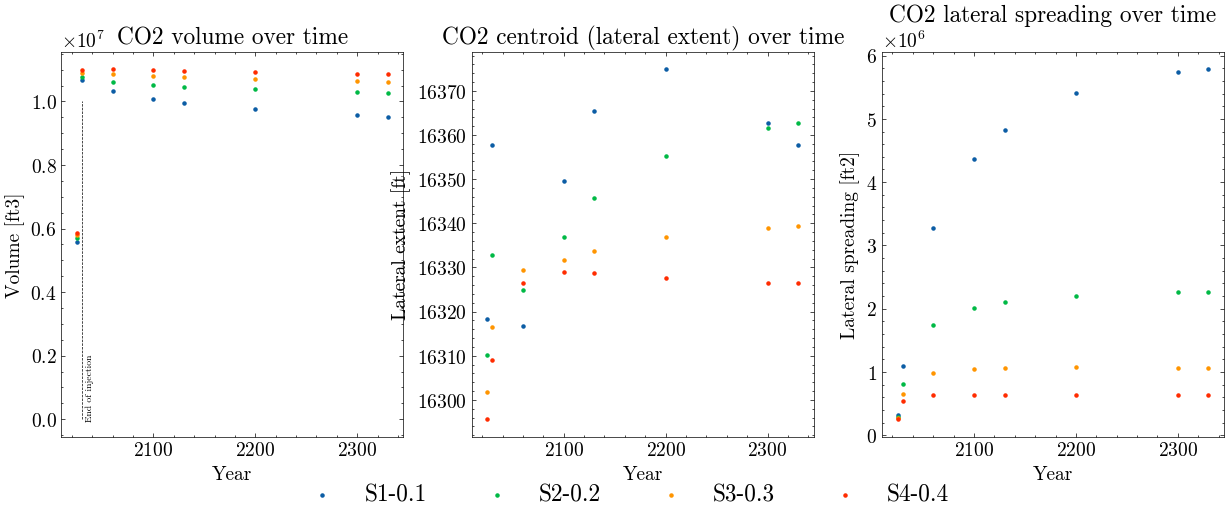

In [13]:
#scrit = np.round(np.arange(0.1,0.5,0.1),2)
dates = [2025,2030,2060,2100,2130,2200,2300,2330]
#colors = ['blue','green','red','orange','purple','brown','pink']
scenarios = ['S1','S2','S3','S4']

# Plot plume saturation over time all scenarios
bdp.plot_plume(rel_perm,gas_dict_krg,size=size)

# Gas saturation profiles
for i in range(size):
    fig = bdp.saturation_profile(gas_dict_krg[f'S{i+1}'],z,scrit[i],gas_trapped=trapped_dict[f'S{i+1}'],trapped=True)
    #fig.savefig(f'C:/Users/ubillusj/Desktop/CMG/Ubillus_simulations/hyskrg_midpoint/results_krg/saturation_profile_{i+1}.png',dpi=300,pad_inches=0.2,bbox_inches='tight')

# Stacked bar plots contribution of residual saturation to trapping saturation
mean_trp = bdp.plot_contribution_residual_sat(scrit,trapped_dict,size,scenarios)

# Plot pressure buildup in different scenarios
bdp.plot_batch_pressure(p_dict_krg,z,size)

# Plot residual and solubility trapping indexes
for i in range(size):
    idx = bdp.indexes(special_dict_krg[f'S{i+1}']['Dissolved'],special_dict_krg[f'S{i+1}']['Trapped'],special_dict_krg[f'S{i+1}']['Super-critical'],4.83e9)
    fig = bdp.plot_indexes(special_dict_krg[f'S{i+1}']['Date'],idx[0],idx[1])
    #fig.savefig(f'C:/Users/ubillusj/Desktop/CMG/Ubillus_simulations/hyskrg_midpoint/results_krg/idx_{i+1}.png',dpi=300,pad_inches=0.2,bbox_inches='tight')

# Plot spatial moments of the plume
mts_2 = bdp.batch_plot_moments(gas_dict_krg,porosity,volume,x,z,dates,scrit=scrit,cl=colors)

## Third case: No hysteresis and no dissolution included

In [6]:
# Load data from simulations
gas_dict_nod = {} ; p_dict_nod = {} ; special_dict_nod = {}
size = 4
path = 'C:/Users/ubillusj/Box/2022-2023 GRA/Simulation/CMG_Ubillus/Ubillus_simulations/hyskrg_midpoint/results_nokrg_nodiss/'

for i in range(size):
    folder = 'S' + str(i+1)
    
    gas_dict_nod[folder] = bdp.mul_list_to_array(path + folder,'/Het2D_nokrg_nodiss Gas Saturation.gslib',shape,size=8)
    p_dict_nod[folder] = bdp.mul_list_to_array(path + folder,'/Het2D_nokrg_nodiss Pressure.gslib',shape,size=2)
    special_dict_nod[folder] = bdp.special_table(path + folder,'/special.xlsx')

### Simulation results analysis
- Gas saturation vs depth
- Pressure profile
- Residual and solubility trapping index, if present.
- Spatial Moment Analysis

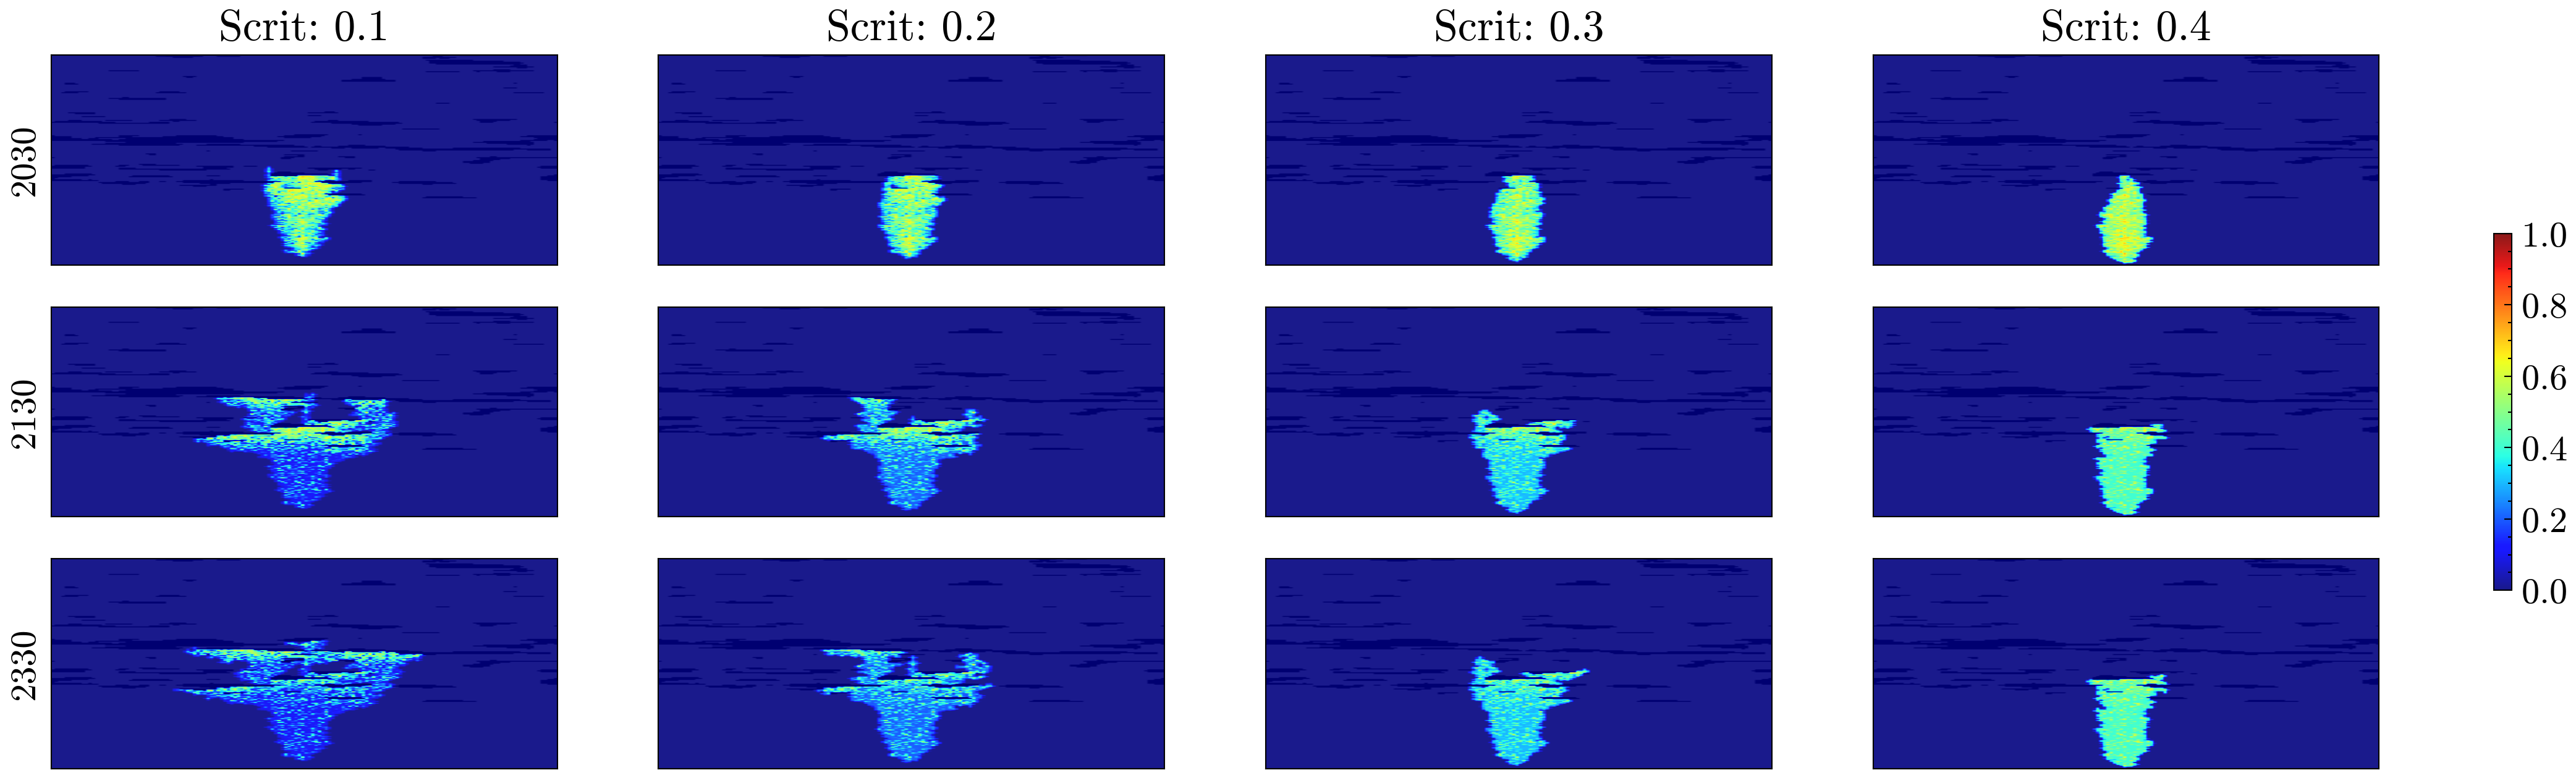

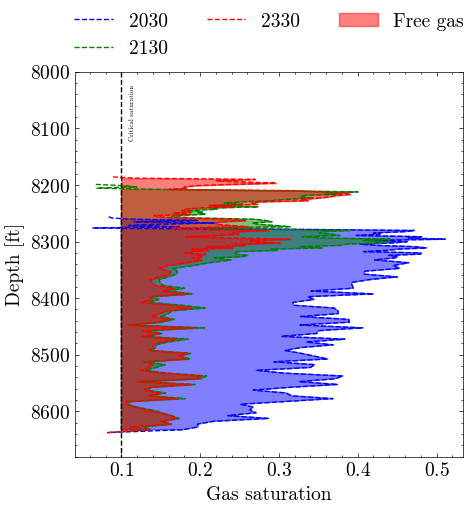

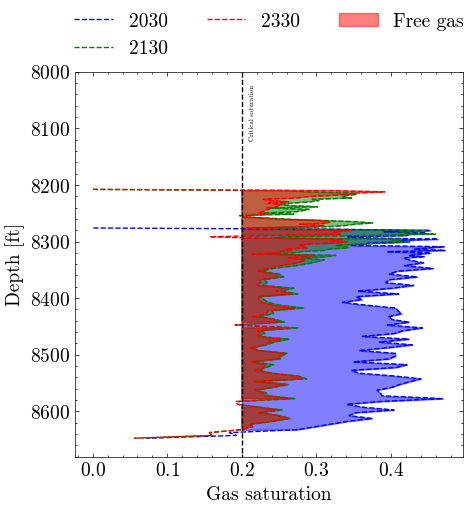

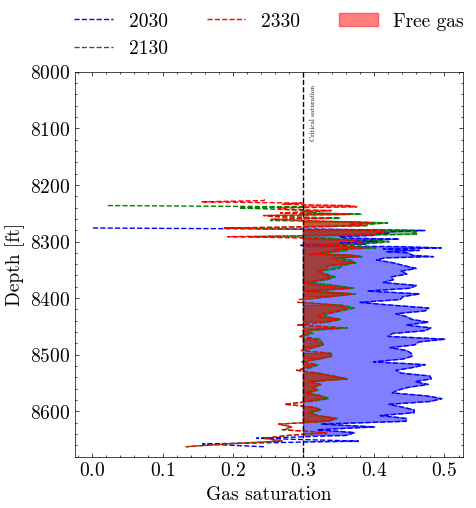

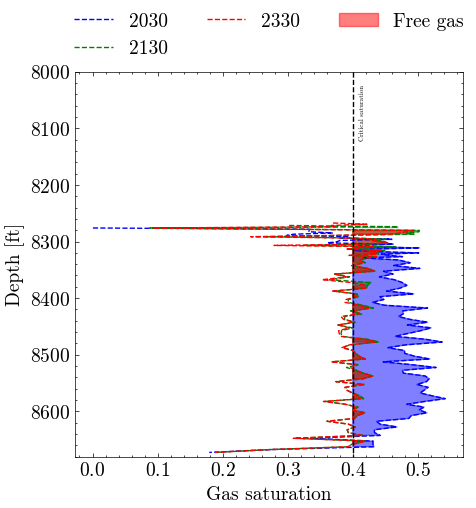

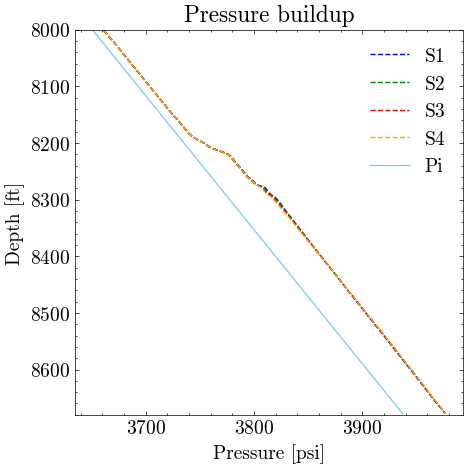

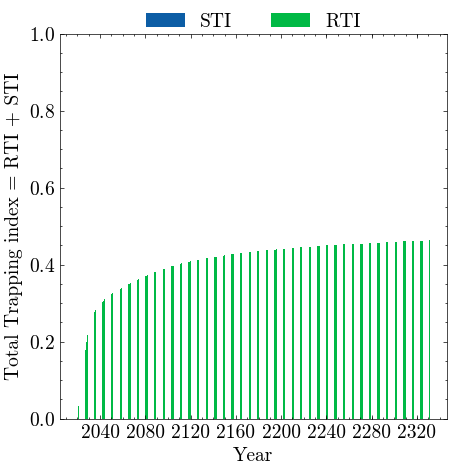

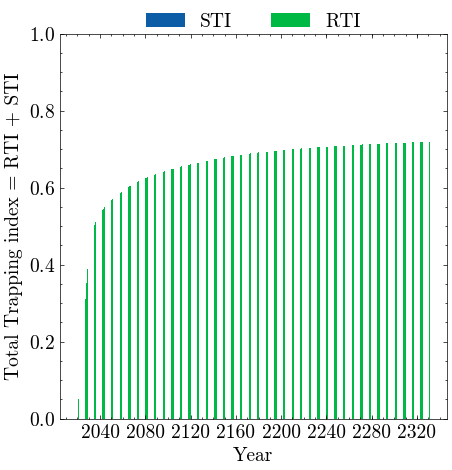

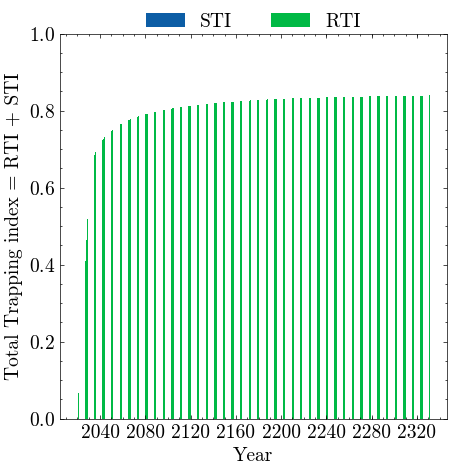

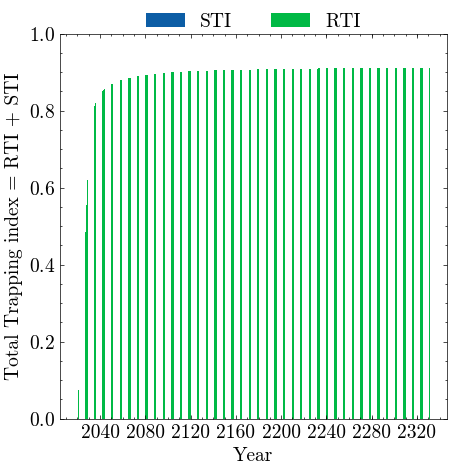

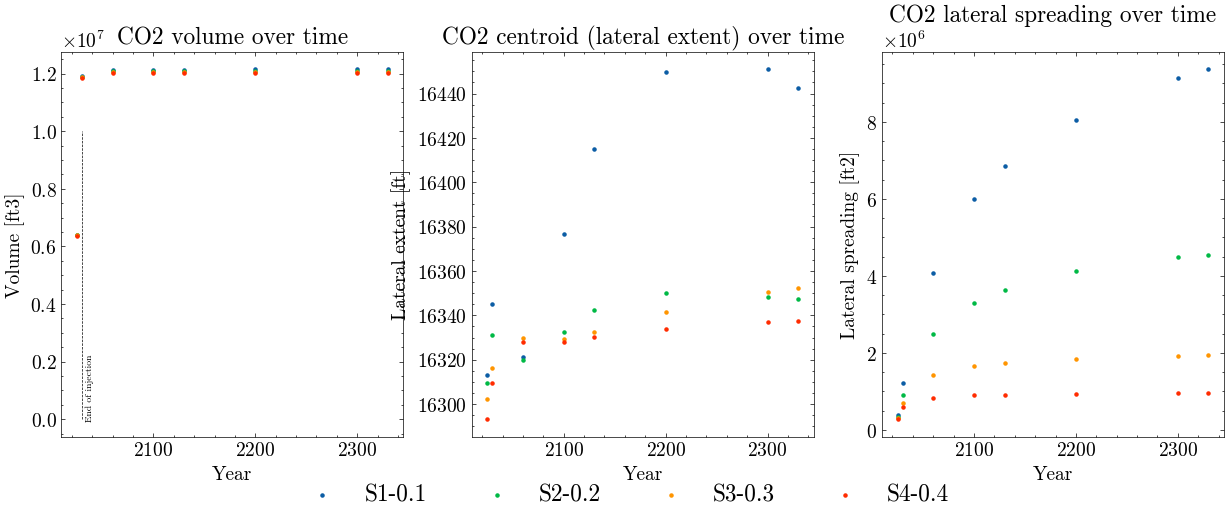

In [14]:
# Plot plume saturation over time all scenarios
bdp.plot_plume(rel_perm,gas_dict_nod,size=size)

# Gas saturation profiles
for i in range(size):
    fig = bdp.saturation_profile(gas_dict_nod[f'S{i+1}'],z,scrit[i],trapped=False)
    #fig.savefig(f'C:/Users/ubillusj/Desktop/CMG/Ubillus_simulations/hyskrg_midpoint/results_nokrg_nodiss/saturation_profile_{i+1}.png',dpi=300,pad_inches=0.2,bbox_inches='tight')

# Plot pressure buildup in different scenarios
bdp.plot_batch_pressure(p_dict_nod,z,size)

# Plot residual and solubility trapping indexes
for i in range(size):
    idx_nod = bdp.indexes(special_dict_nod[f'S{i+1}']['Dissolved'],special_dict_nod[f'S{i+1}']['Trapped'],special_dict_nod[f'S{i+1}']['Super-critical'],4.83e9)
    fig = bdp.plot_indexes(special_dict_nod[f'S{i+1}']['Date'],idx_nod[0],idx_nod[1])
    #fig.savefig(f'C:/Users/ubillusj/Desktop/CMG/Ubillus_simulations/hyskrg_midpoint/results_nokrg_nodiss/idx_{i+1}.png',dpi=300,pad_inches=0.2,bbox_inches='tight')

# Plot spatial moments of the plume
mts_3 = bdp.batch_plot_moments(gas_dict_nod,porosity,volume,x,z,dates,scrit=scrit,cl=colors)

## Realistic scenario (hysteresis both rel perm and cap pressure / dissolution)

In [7]:
# Load data from simulations
gas_dict_real = {} ; p_dict_real = {} ; trapped_dict_real = {} ; special_dict_real = {}
size = 4
path = 'C:/Users/ubillusj/Box/2022-2023 GRA/Simulation/CMG_Ubillus/Ubillus_simulations/hyskrg_midpoint/results_realistic/'

for i in range(size):
    folder = 'S' + str(i+1)
    
    gas_dict_real[folder] = bdp.mul_list_to_array(path + folder,'/Het2D_real Gas Saturation.gslib',shape,size=8)
    trapped_dict_real[folder] = bdp.mul_list_to_array(path + folder,'/Het2D_real Sg _ Sgc _ Hysteresis Dynamic trapped gas saturation.gslib',shape,size=8)
    p_dict_real[folder] = bdp.mul_list_to_array(path + folder,'/Het2D_real Pressure.gslib',shape,size=2)
    special_dict_real[folder] = bdp.special_table(path + folder,'/special.xlsx')

### Simulation results analysis
- Gas saturation vs depth.
- Contribution of residual trapping to total trapping
- Pressure profile
- Residual and solubility trapping index, if present.
- Spatial Moment Analysis

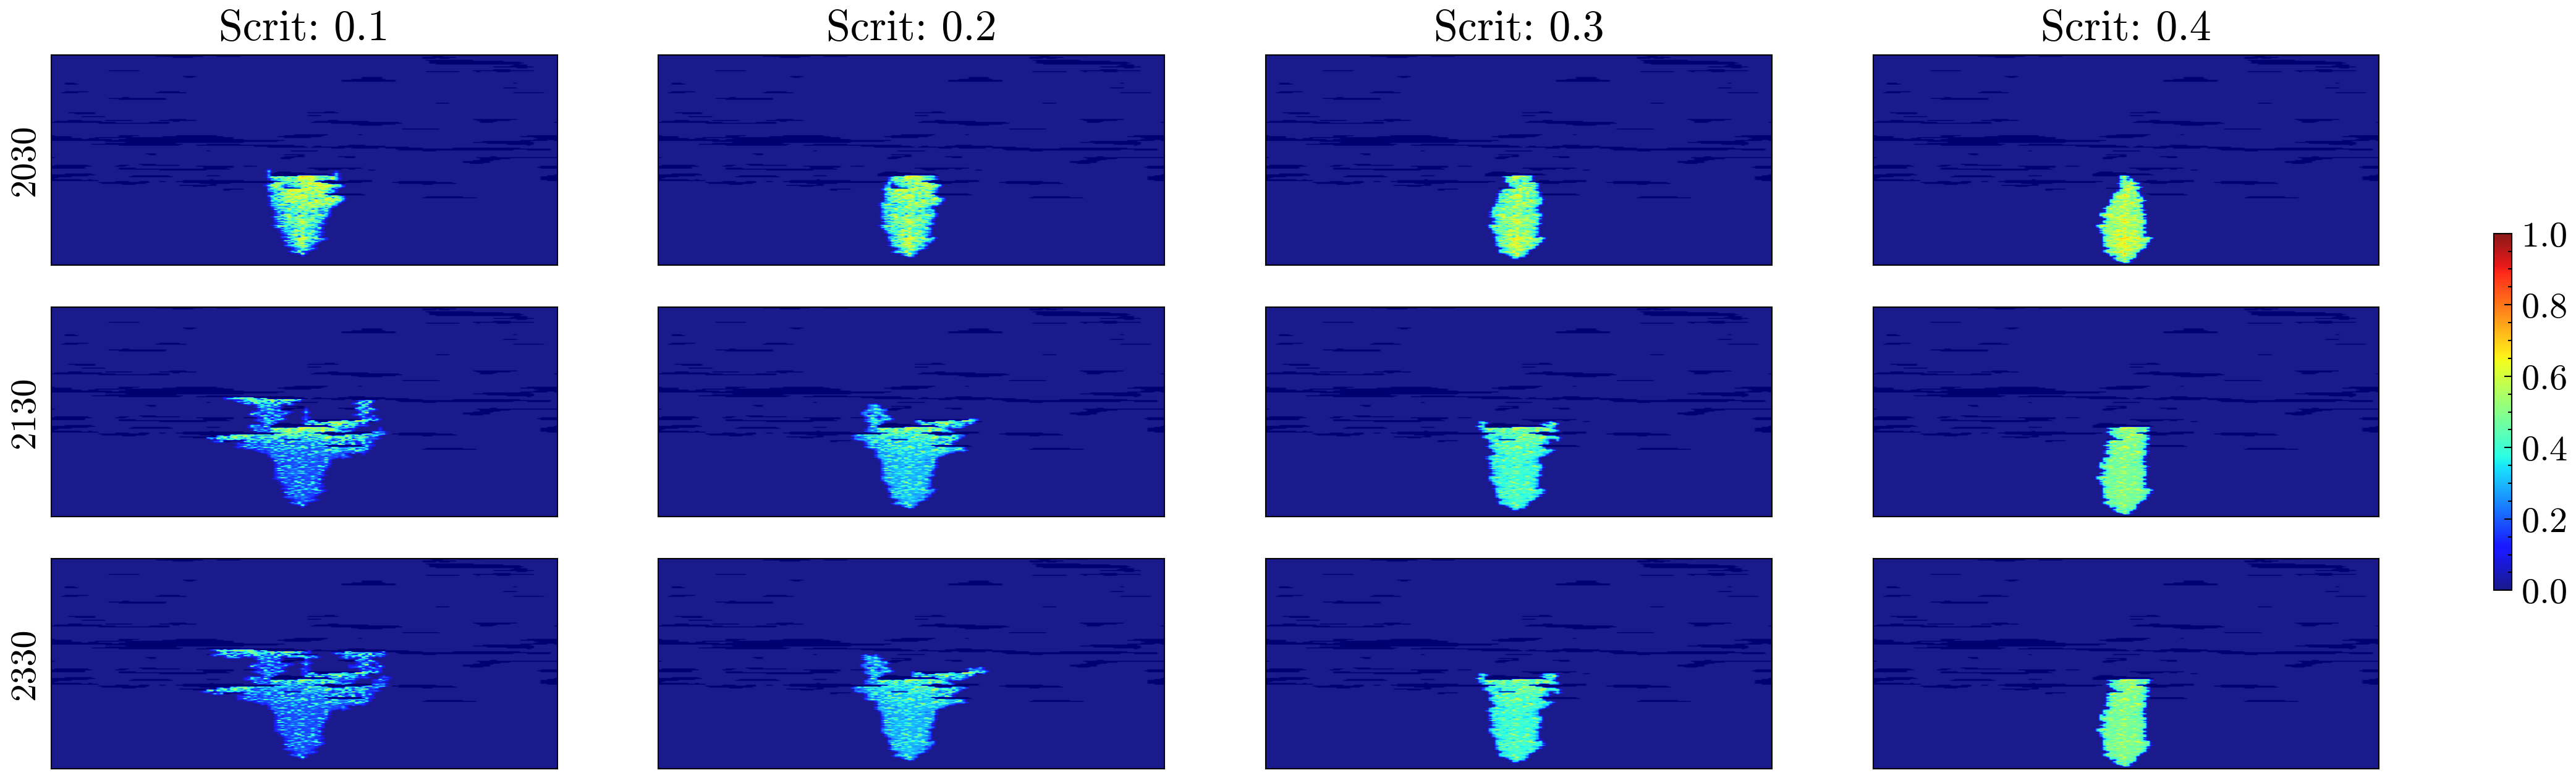

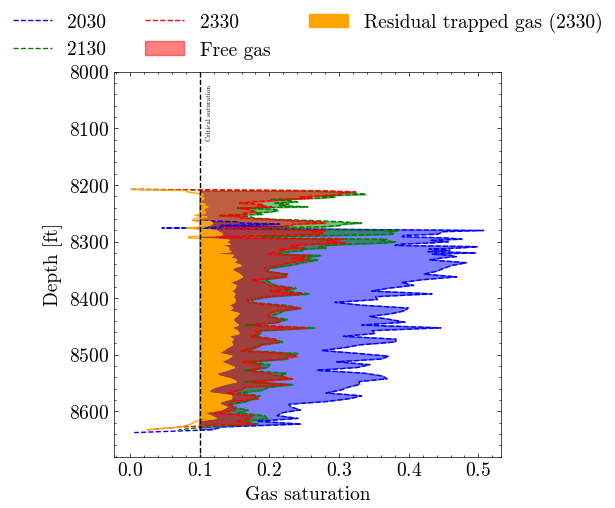

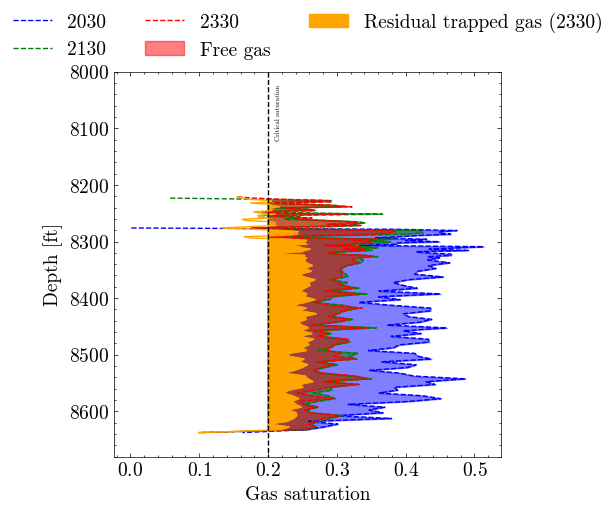

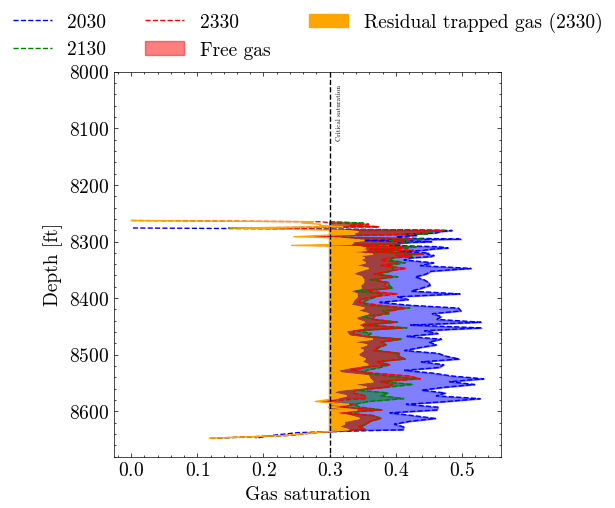

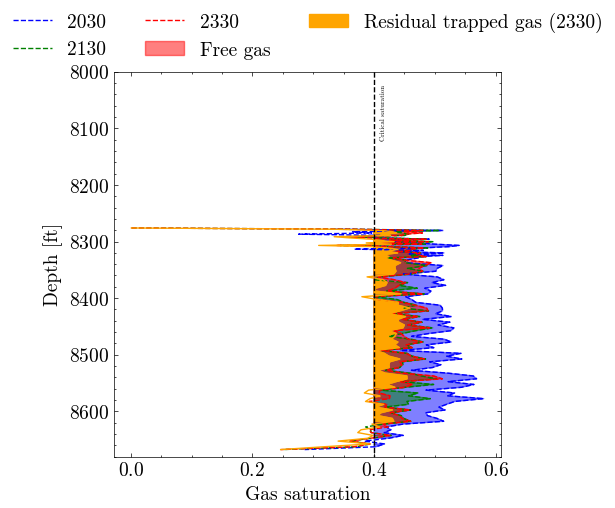

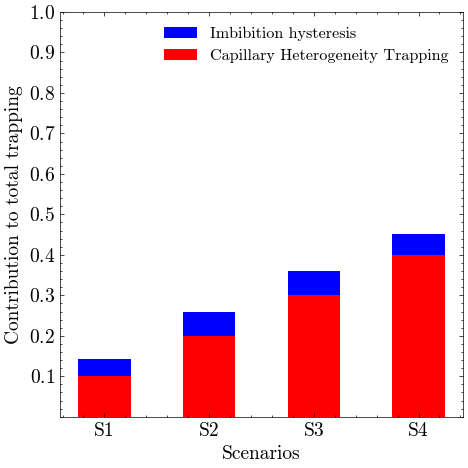

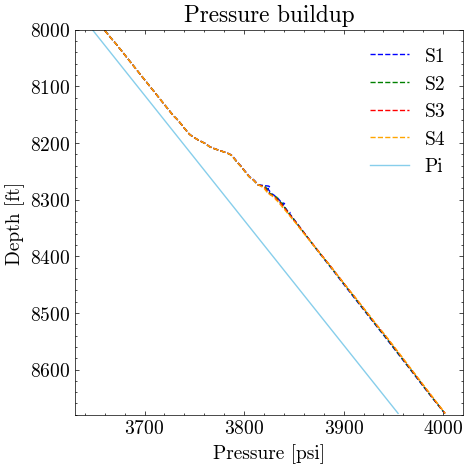

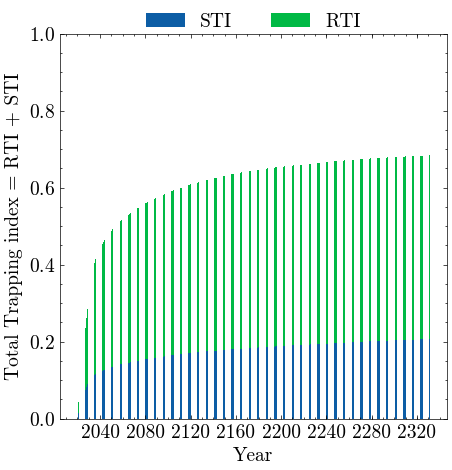

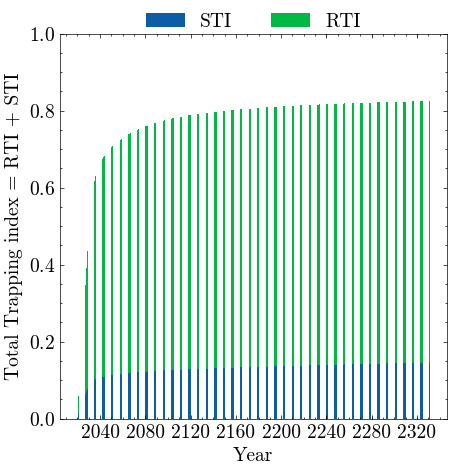

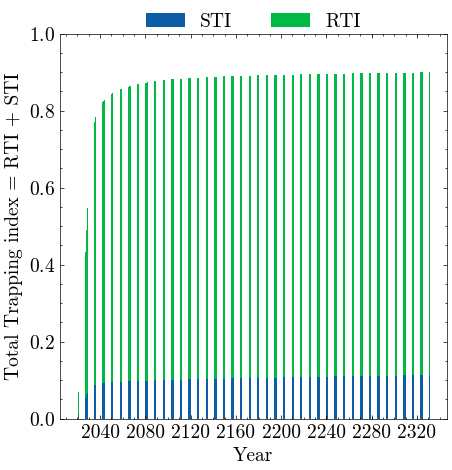

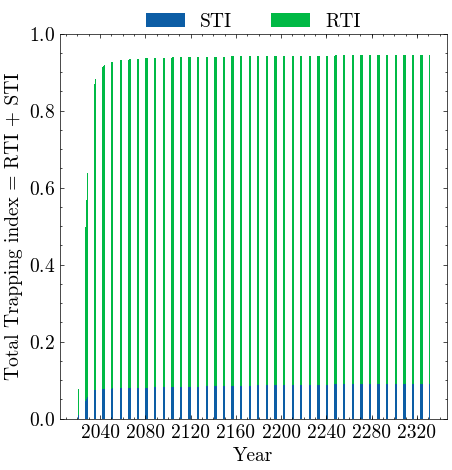

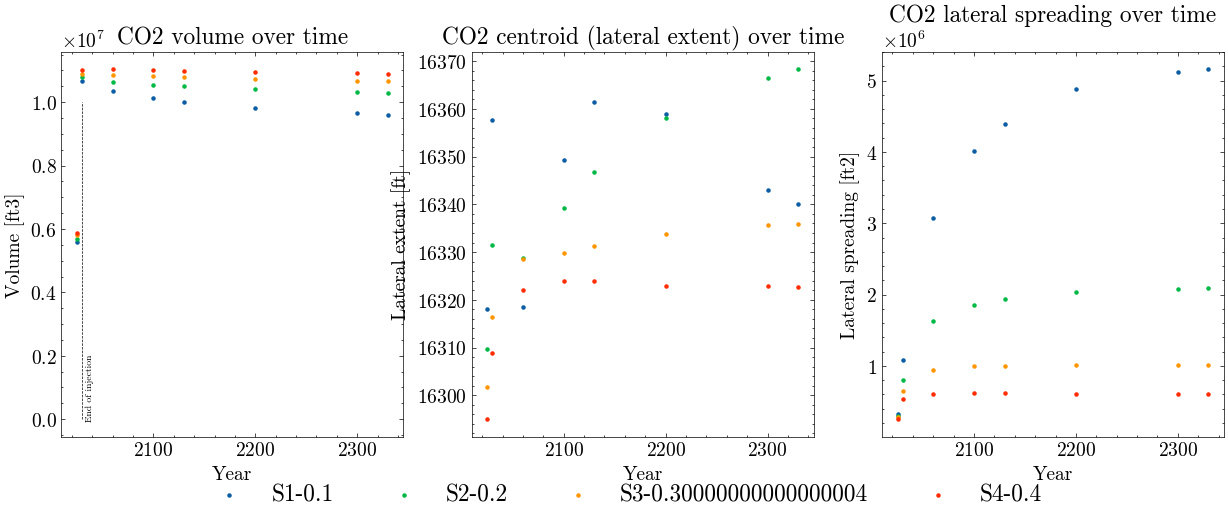

In [16]:
scrit = np.arange(0.1,0.5,0.1)
scenarios = ['S1','S2','S3','S4']
dates = [2025,2030,2060,2100,2130,2200,2300,2330]
#colors = ['blue','green','red','orange','purple','brown','pink']

# Plot plume saturation over time all scenarios
bdp.plot_plume(rel_perm,gas_dict_real,size=size)

# Gas saturation profiles
for i in range(size):
    fig = bdp.saturation_profile(gas_dict_real[f'S{i+1}'],z,scrit[i],gas_trapped=trapped_dict_real[f'S{i+1}'],trapped=True)
    #fig.savefig(f'C:/Users/ubillusj/Desktop/CMG/Ubillus_simulations/hyskrg_midpoint/results_realistic/saturation_profile_{i+1}.png',dpi=300,pad_inches=0.2,bbox_inches='tight')


# Plot contribution of residual saturation to trapping
mean_trp = bdp.plot_contribution_residual_sat(scrit,trapped_dict_real,size,scenarios)

# Plot pressure buildup in different scenarios
bdp.plot_batch_pressure(p_dict_real,z,size)

# Plot residual and solubility trapping indexes
for i in range(size):
    idx_real = bdp.indexes(special_dict_real[f'S{i+1}']['Dissolved'],special_dict_real[f'S{i+1}']['Trapped'],special_dict_real[f'S{i+1}']['Super-critical'],4.83e9)
    fig = bdp.plot_indexes(special_dict_real[f'S{i+1}']['Date'],idx_real[0],idx_real[1])
    #fig.savefig(f'C:/Users/ubillusj/Desktop/CMG/Ubillus_simulations/hyskrg_midpoint/results_realistic/idx_{i+1}.png',dpi=300,pad_inches=0.2,bbox_inches='tight')

# Plot spatial moments of the plume
mts_4 = bdp.batch_plot_moments(gas_dict_real,porosity,volume,x,z,dates,scrit=scrit,cl=colors)

# Paper/Presentation plots

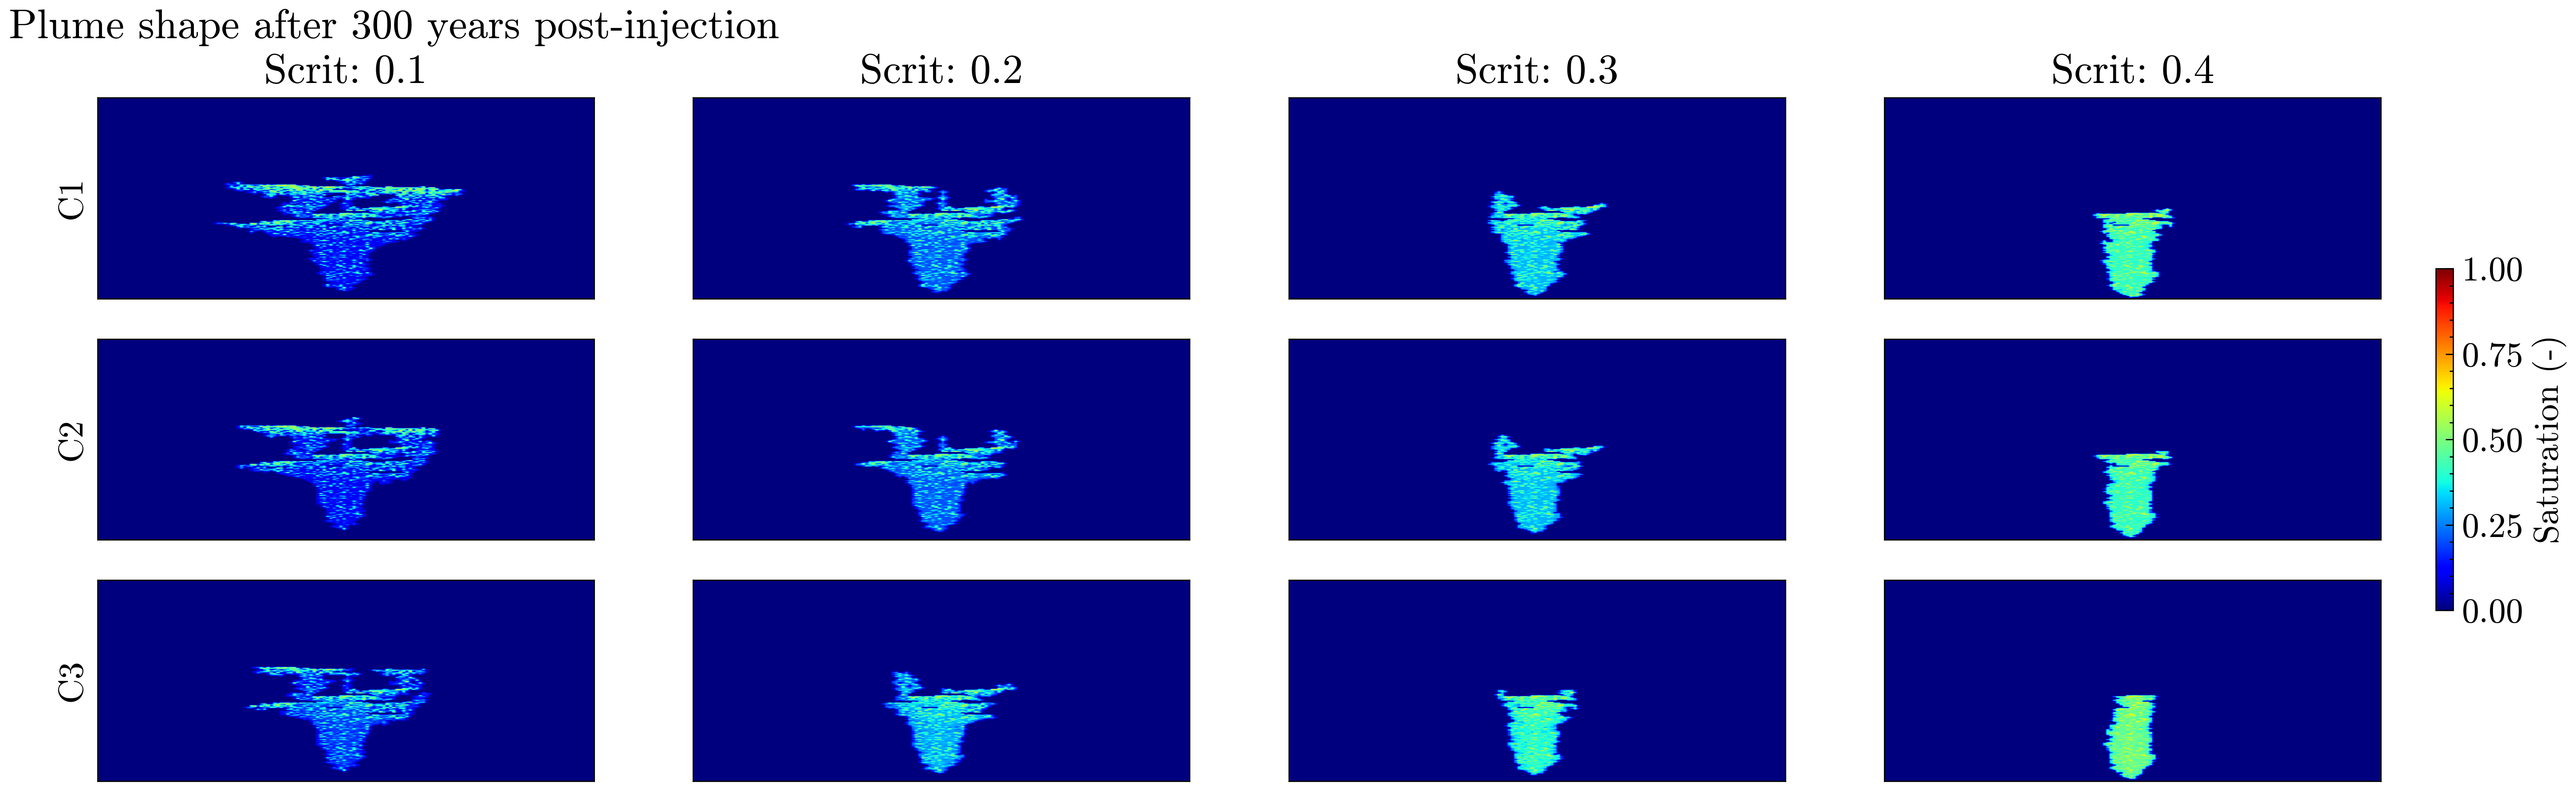

In [8]:
size_scrit = 4

# 1 Saturation fields at the end of post-injection 
fig, ax = plt.subplots(3,size_scrit,figsize=(20,5),dpi=400)

for i in range(size_scrit):
    im = ax[0,i].imshow(gas_dict_nod[f'S{i+1}'][:,:,-1],cmap='jet',vmin=0,vmax=1,aspect='auto')
    ax[1,i].imshow(gas_dict[f'S{i+1}'][:,:,-1],cmap='jet',vmin=0.0,vmax=1,aspect='auto')
    ax[2,i].imshow(gas_dict_real[f'S{i+1}'][:,:,-1],cmap='jet',vmin=0.0,vmax=1,aspect='auto')
    
    for j in range(3):
        ax[0,i].set_title(f'Scrit: 0.{i+1}')
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])
        
ax[0,0].set_ylabel('C1')
ax[1,0].set_ylabel('C2')
ax[2,0].set_ylabel('C3')

fig.colorbar(im,ax=ax.ravel().tolist(),orientation='vertical',shrink=0.5,pad=0.02,ticks=[0,0.25,0.50,0.75,1],label='Saturation (-)')
fig.suptitle('Plume shape after 300 years post-injection',ha='left',x=0.1)
plt.show()
    

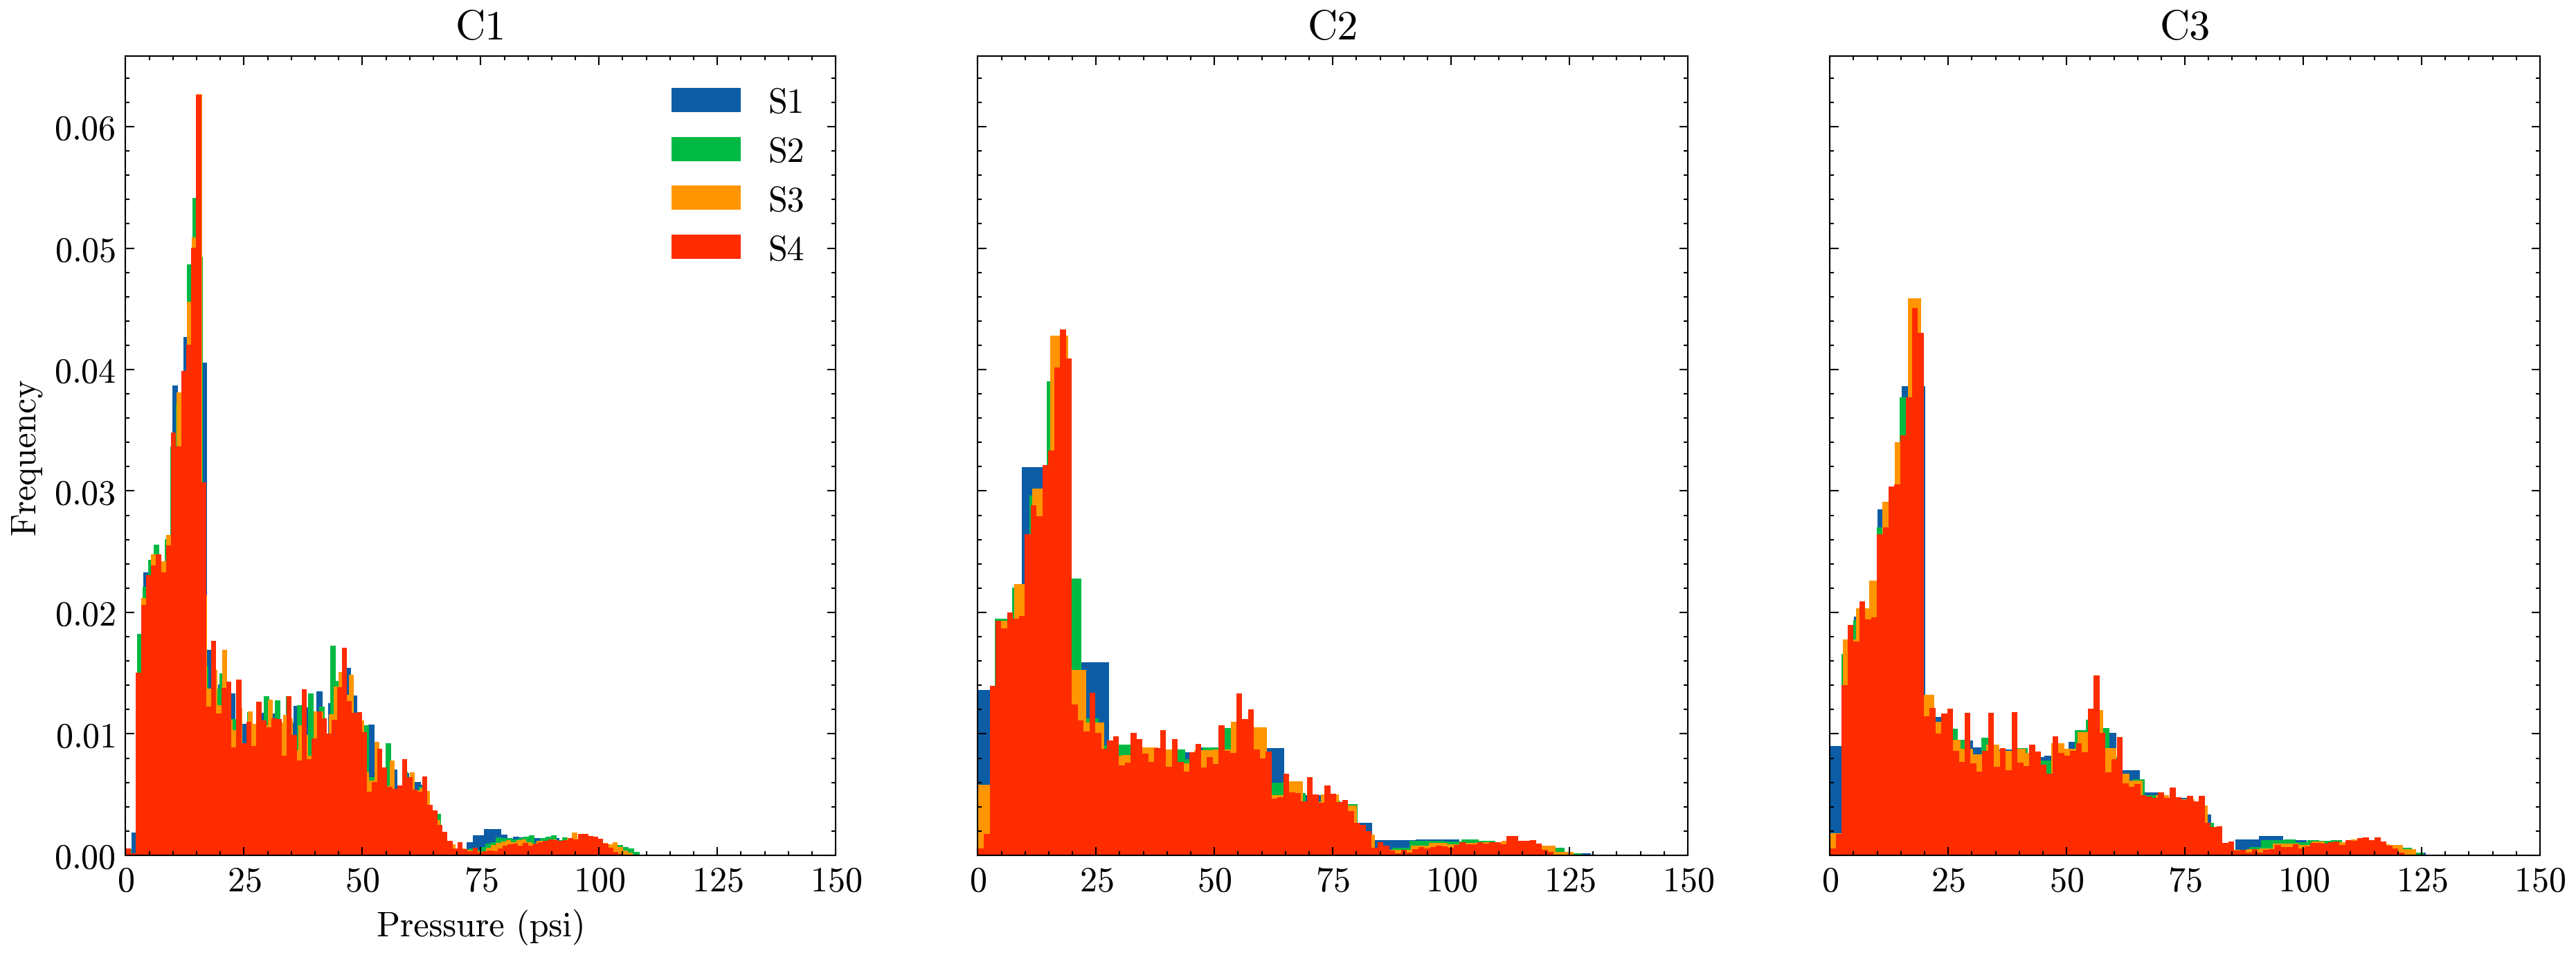

In [48]:
# 2 Grid-block Pressure distribution along three scenarios
fig,ax = plt.subplots(1,3,figsize=(15,5),dpi=300,sharex=True,sharey=True)

for i in range(size_scrit):
    dp_nod = p_dict_nod[f'S{i+1}'][:,:,-1] - p_dict_nod[f'S{i+1}'][:,:,0]
    dp = p_dict[f'S{i+1}'][:,:,-1] - p_dict[f'S{i+1}'][:,:,0]
    dp_real = p_dict_real[f'S{i+1}'][:,:,-1] - p_dict_real[f'S{i+1}'][:,:,0]
    ax[0].hist(x=dp_nod.flatten(),density=True,bins=100,label=f'S{i+1}')
    ax[1].hist(x=dp.flatten(),density=True,bins=100,label=f'S{i+1}')
    ax[2].hist(x=dp_real.flatten(),density=True,bins=100,label=f'S{i+1}')
    
ax[0].set_title('C1')
ax[1].set_title('C2')
ax[2].set_title('C3')
ax[0].legend()

ax[0].set_xlabel('Pressure (psi)')
ax[0].set_ylabel('Frequency')

ax[0].set_xlim(0,150)

plt.show()
    

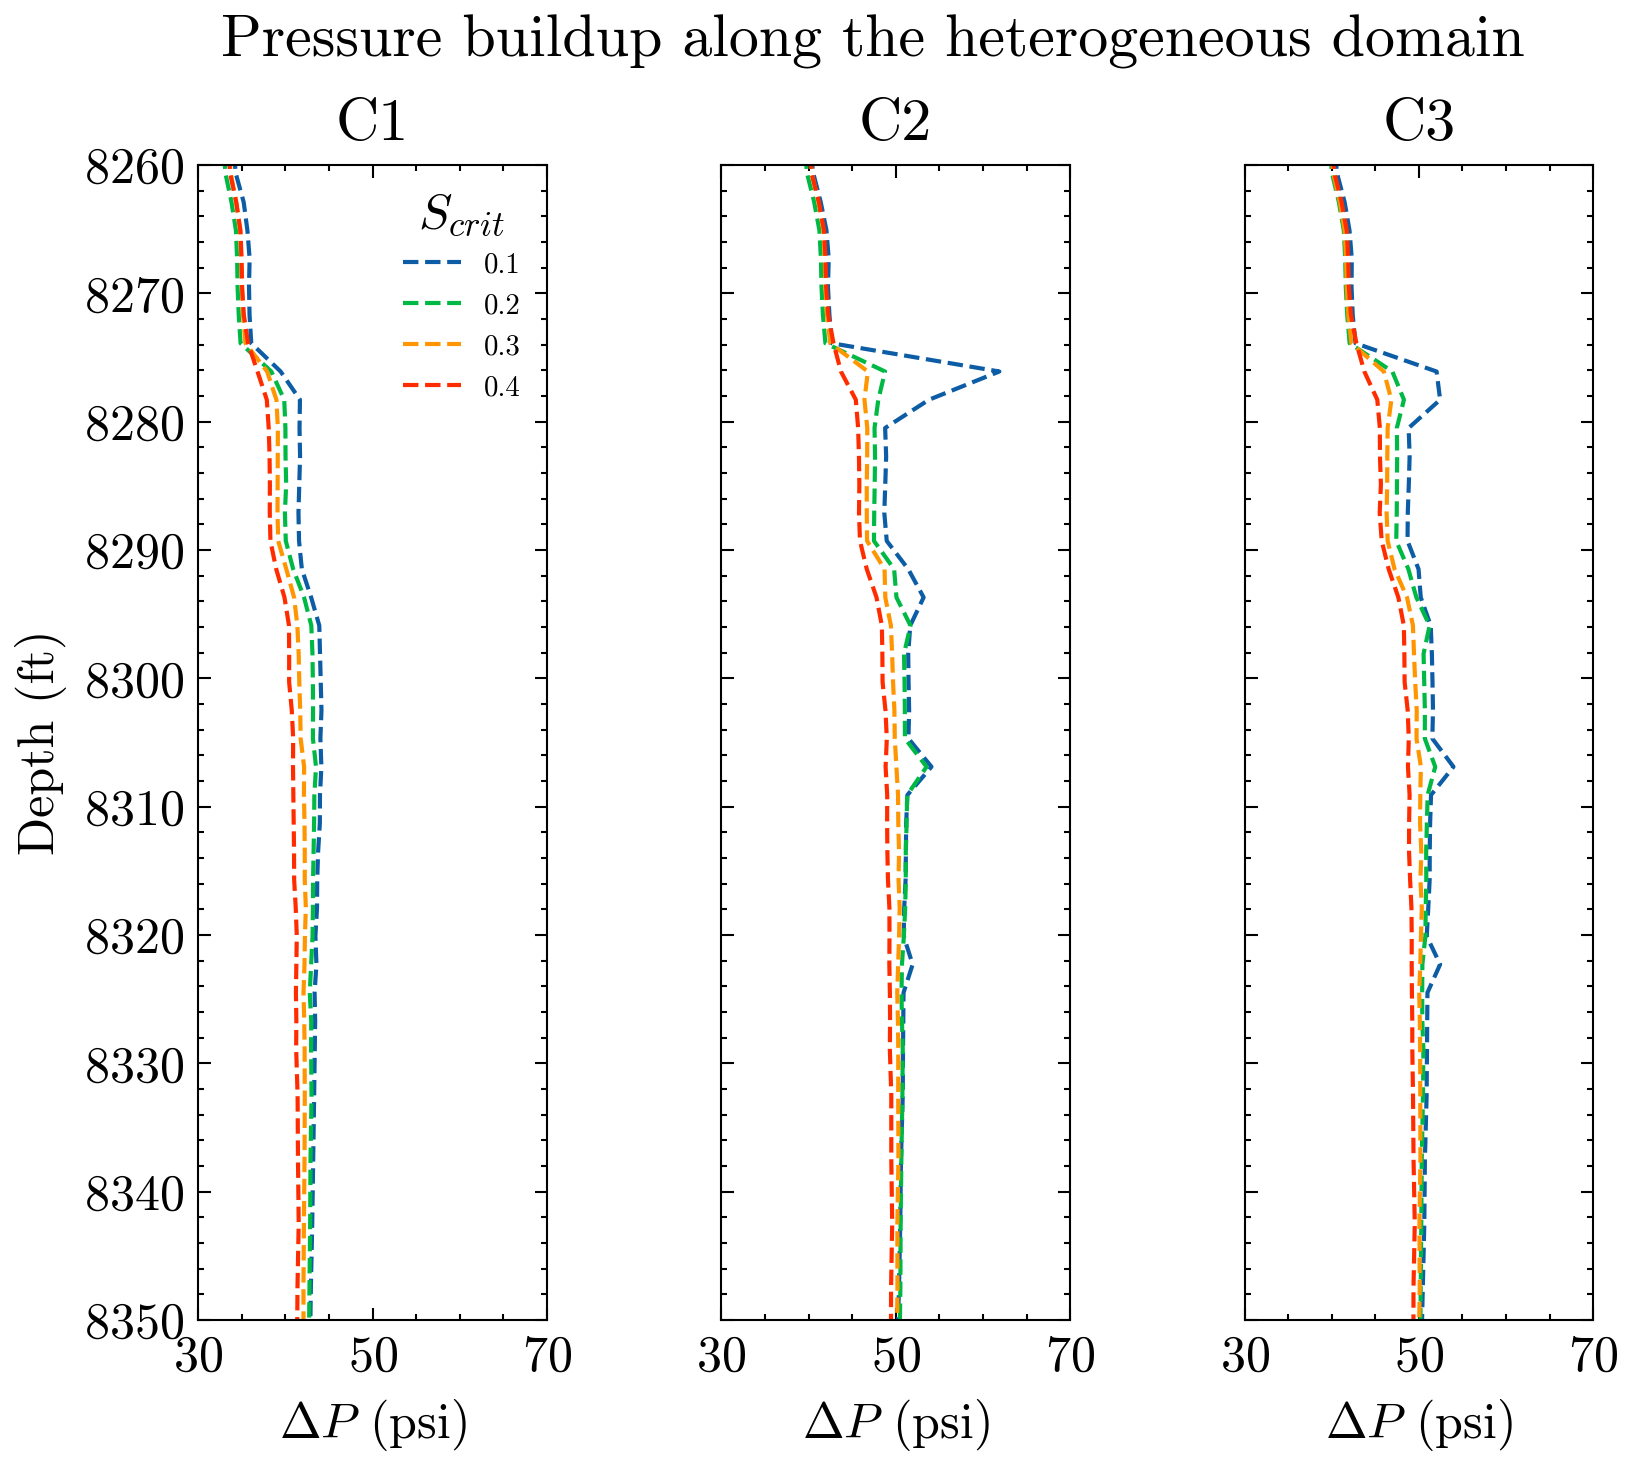

In [257]:
# 2 Pressure difference along depth (anoither way to view pressure response)
fig, ax = plt.subplots(1,3,figsize=(6,5),dpi=300,sharex=True,sharey=True)

for i in range(size_scrit):
    pnod = np.mean(p_dict_nod[f'S{i+1}'][:,:,-1],axis=1) - np.mean(p_dict_nod[f'S{i+1}'][:,:,0],axis=1)
    p = np.mean(p_dict[f'S{i+1}'][:,:,-1],axis=1) - np.mean(p_dict[f'S{i+1}'][:,:,0],axis=1)
    p_real = np.mean(p_dict_real[f'S{i+1}'][:,:,-1],axis=1) - np.mean(p_dict_real[f'S{i+1}'][:,:,0],axis=1)
    
    ax[0].plot(pnod,z[:,0],linewidth=1,linestyle='--',label=f'0.{i+1}')
    ax[1].plot(p,z[:,0],linewidth=1,linestyle='--')
    ax[2].plot(p_real,z[:,0],linewidth=1,linestyle='--')
    
ax[0].set_ylabel('Depth (ft)')


ax[0].set_ylim(8260,8350)
ax[0].invert_yaxis()

ax[0].set_title('C1')
ax[1].set_title('C2')
ax[2].set_title('C3')
ax[0].legend(loc='best',fontsize='xx-small',title='$S_{crit}$')

for ax in ax:
    ax.set_xlabel('$\Delta P$ (psi)')
    ax.set_xlim(30,70)
    ax.set_xticks([30,50,70])

fig.suptitle('Pressure buildup along the heterogeneous domain')
plt.subplots_adjust(wspace=0.5)
plt.show()
                                                                                         

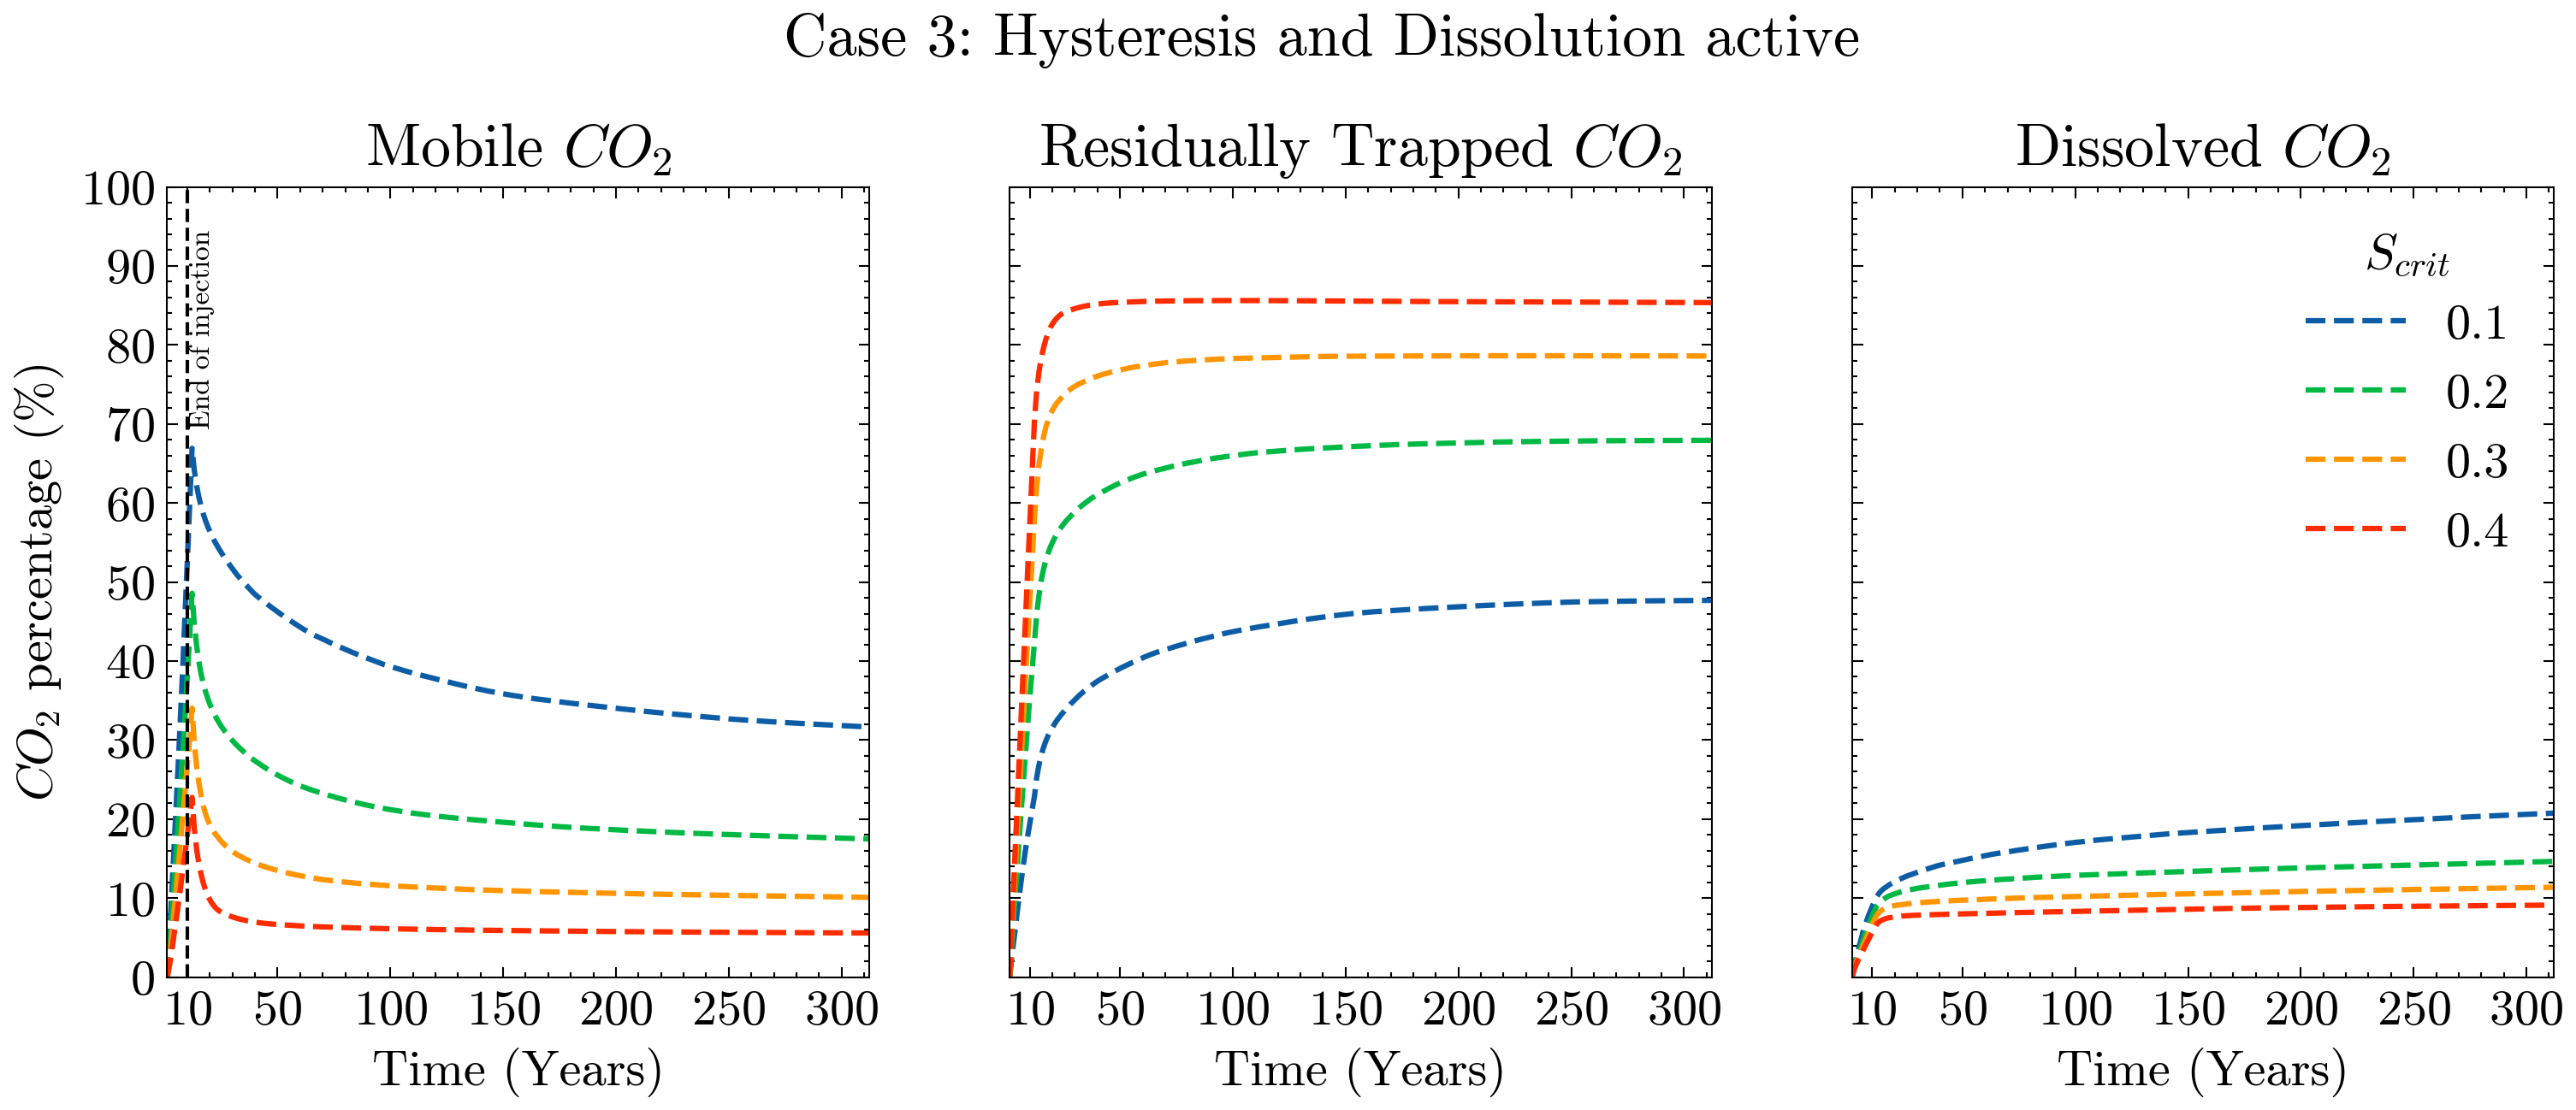

In [12]:
# 3 Time series CO2 moles
import matplotlib.dates as mdates
fig, axs = plt.subplots(1,3,figsize=(12,4),dpi=300,sharex=True,sharey=True)
for i in range(size_scrit):
    axs[2].plot(special_dict_real[f'S{i+1}']['Time (days)']/365,special_dict_real[f'S{i+1}']['Dissolved']/4.83e9*100,linewidth=1.5,linestyle='dashed',label=f'0.{i+1}')
    axs[1].plot(special_dict_real[f'S{i+1}']['Time (days)']/365,special_dict_real[f'S{i+1}']['Trapped']/4.83e9*100,linewidth=1.5,linestyle='dashed',label=f'0.{i+1}')
    axs[0].plot(special_dict_real[f'S{i+1}']['Time (days)']/365,(special_dict_real[f'S{i+1}']['Super-critical']-special_dict_real[f'S{i+1}']['Trapped'])/4.83e9*100,linewidth=1.5,linestyle='dashed',label=f'0.{i+1}')
    #print(special_dict_real[f'S{i+1}']['Dissolved'] +special_dict_real[f'S{i+1}']['Super-critical'])
    #axs[1].plot(special_dict[f'S{i+1}']['Time (days)']/365,special_dict[f'S{i+1}']['Trapped'],linewidth=1,linestyle='dashed',label=f'S{i+1}')
#ax.plot(special_dict_real['S1']['Time (days)'],special_dict_real['S1']['Dissolved'] + special_dict_real['S1']['Super-critical'],linewidth=1,linestyle='solid',label='Total')

axs[0].set_ylabel('$CO_2$ percentage (%)')
axs[0].set_ylim(0,100)
axs[0].set_yticks(np.arange(0,110,10))
axs[2].legend(title='$S_{crit}$')
axs[0].vlines(10,0,100,linestyle='dashed',color='black')
axs[0].text(11,70,'End of injection',rotation=90,fontsize=8)

axs[0].set_title('Mobile $CO_2$')
axs[1].set_title('Residually Trapped $CO_2$')
axs[2].set_title('Dissolved $CO_2$')

for ax in axs: 
    ax.set_xlabel('Time (Years)')
    ax.set_xticks([10,50,100,150,200,250,300,350])
    ax.margins(0,0)

fig.suptitle('Case 3: Hysteresis and Dissolution active',y=1.05)
plt.show()

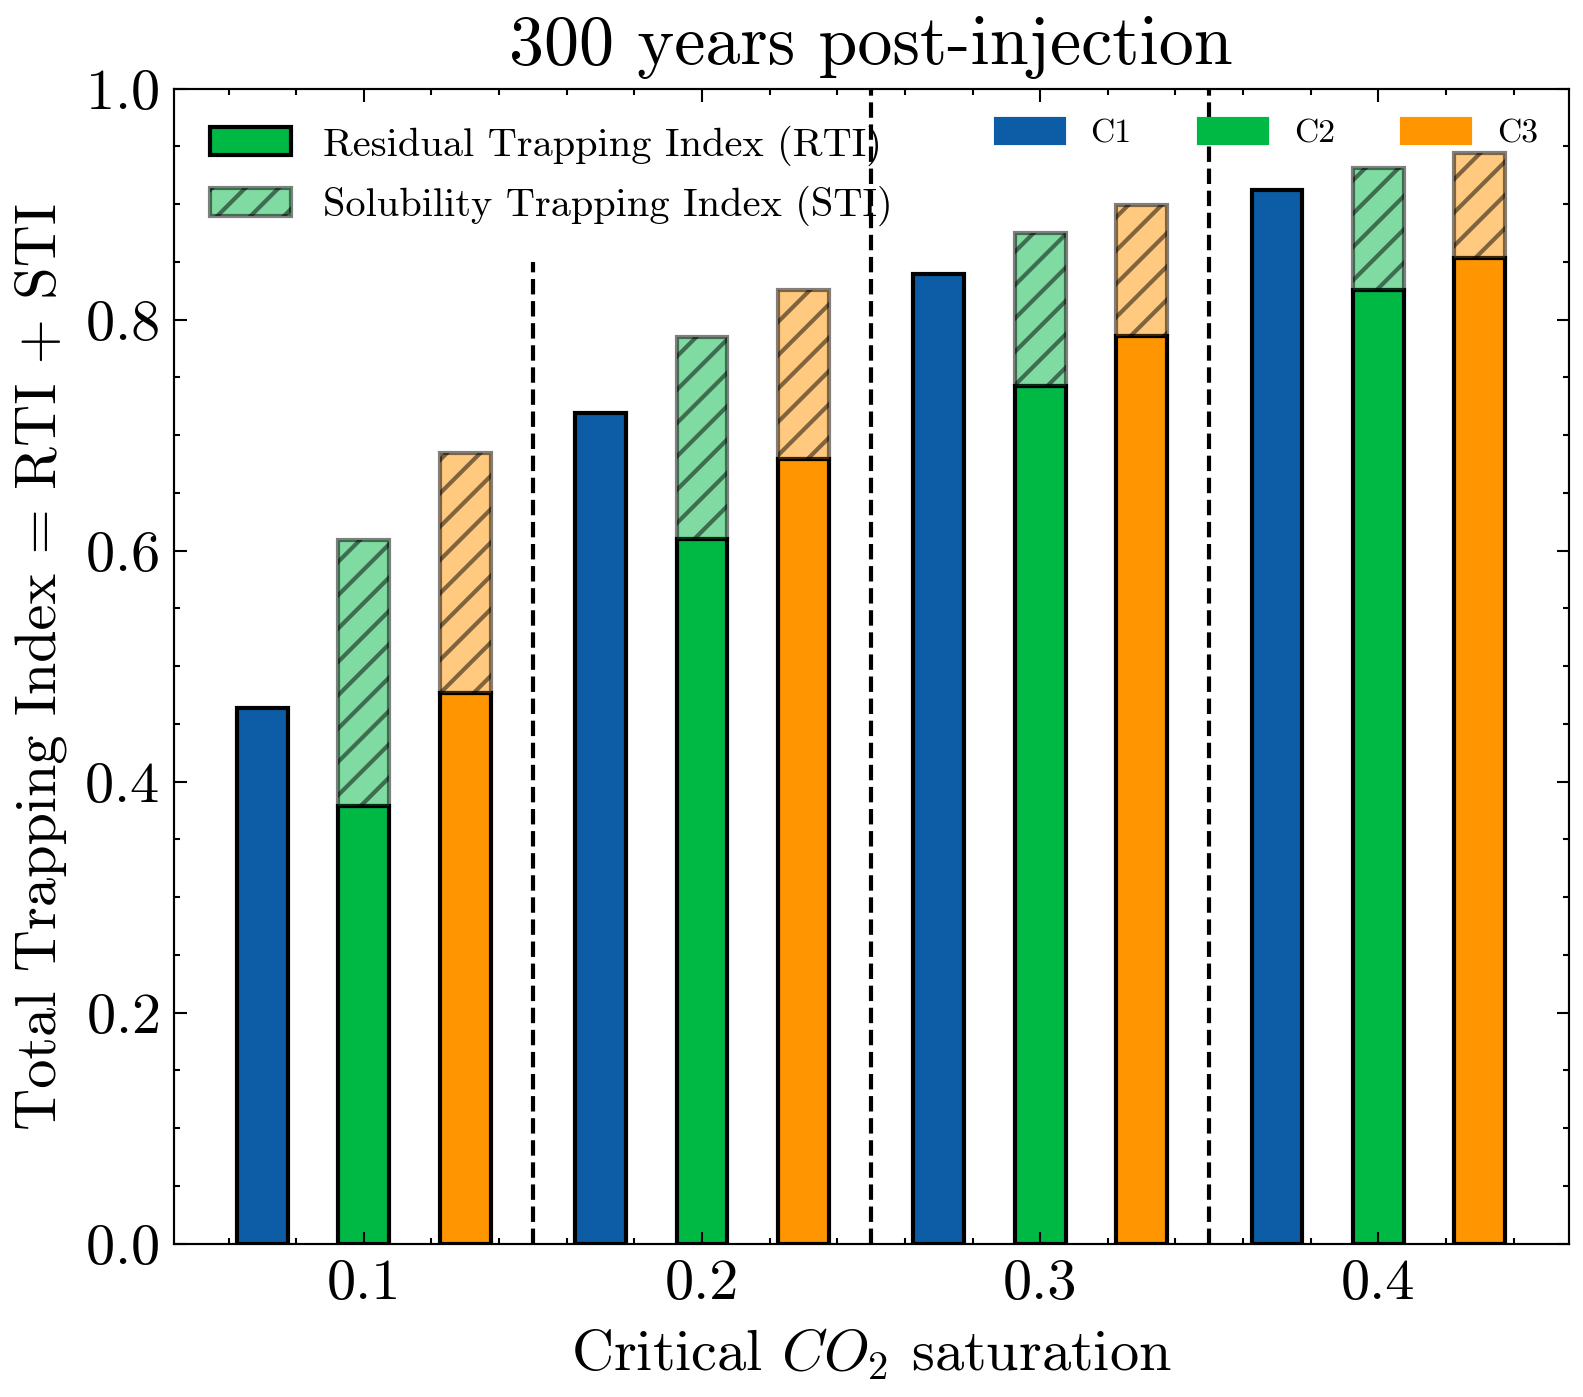

In [13]:
# 4 Comparison of residual and trapping index at the end of postinjectioin
import matplotlib.patches as mpatches

labels = ['C1','C2','C3']
scrit = np.arange(0.1,0.5,0.1)
scenarios = ['0.1','0.2','0.3','0.4'] #,'S5','S6','S7']

# Compare residual trapping index in all scenarios
idx_real = {}
idx_nod = {}
idx = {}

for j in range(size_scrit):
    idx_real[f'S{j+1}'] = bdp.indexes(special_dict_real[f'S{j+1}']['Dissolved'],special_dict_real[f'S{j+1}']['Trapped'],special_dict_real[f'S{j+1}']['Super-critical'],4.83e9)
    idx_nod[f'S{j+1}'] = bdp.indexes(special_dict_nod[f'S{j+1}']['Dissolved'],special_dict_nod[f'S{j+1}']['Trapped'],special_dict_nod[f'S{j+1}']['Super-critical'],4.83e9)
    idx[f'S{j+1}'] = bdp.indexes(special_dict[f'S{j+1}']['Dissolved'],special_dict[f'S{j+1}']['Trapped'],special_dict[f'S{j+1}']['Super-critical'],4.83e9)

fig, ax = plt.subplots(figsize=(6,5),dpi=300)

for j in range(size):
    ax.bar((j+1)-0.3,idx_nod[f'S{j+1}'][0][-1],width=0.15,color='C0',edgecolor='black')
    ax.bar((j+1),idx[f'S{j+1}'][0][-1],width=0.15,color='C1',edgecolor='black',label='Residual Trapping Index (RTI)')
    ax.bar((j+1)+0.3,idx_real[f'S{j+1}'][0][-1],width=0.15,color='C2',edgecolor='black')
    ax.bar((j+1),idx[f'S{j+1}'][1][-1],width=0.15,color='C1',hatch='///',bottom=idx[f'S{j+1}'][0][-1],edgecolor='black',alpha=0.5,label='Solubility Trapping Index (STI)')
    ax.bar((j+1)+0.3,idx_real[f'S{j+1}'][1][-1],width=0.15,color='C2',hatch='///',bottom=idx_real[f'S{j+1}'][0][-1],edgecolor='black',alpha=0.5)
ax.set_xticks(np.arange(1,5,1))
ax.set_xticklabels(scenarios)
ax.set_xlabel('Critical $CO_2$ saturation')
ax.set_ylabel('Total Trapping Index = RTI + STI')
ax.set_ylim(0,1)
ax.set_title('300 years post-injection')

ax.vlines(1.5,0,0.85,linestyle='dashed',color='black')
ax.vlines(2.5,0,1,linestyle='dashed',color='black')
ax.vlines(3.5,0,1,linestyle='dashed',color='black')

# Create legend
ax1=ax.twinx()
ax1.set_yticklabels([])
blue_patch = mpatches.Patch(color='C0',label='C1')
green_patch = mpatches.Patch(color='C1',label='C2')
orange_patch = mpatches.Patch(color='C2',label='C3')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), loc='upper left',ncol=1,
            fontsize='x-small',fancybox=True, shadow=True)

ax1.legend(handles=[blue_patch,green_patch,orange_patch],loc='upper right',ncols=3,fontsize='xx-small')
plt.show()

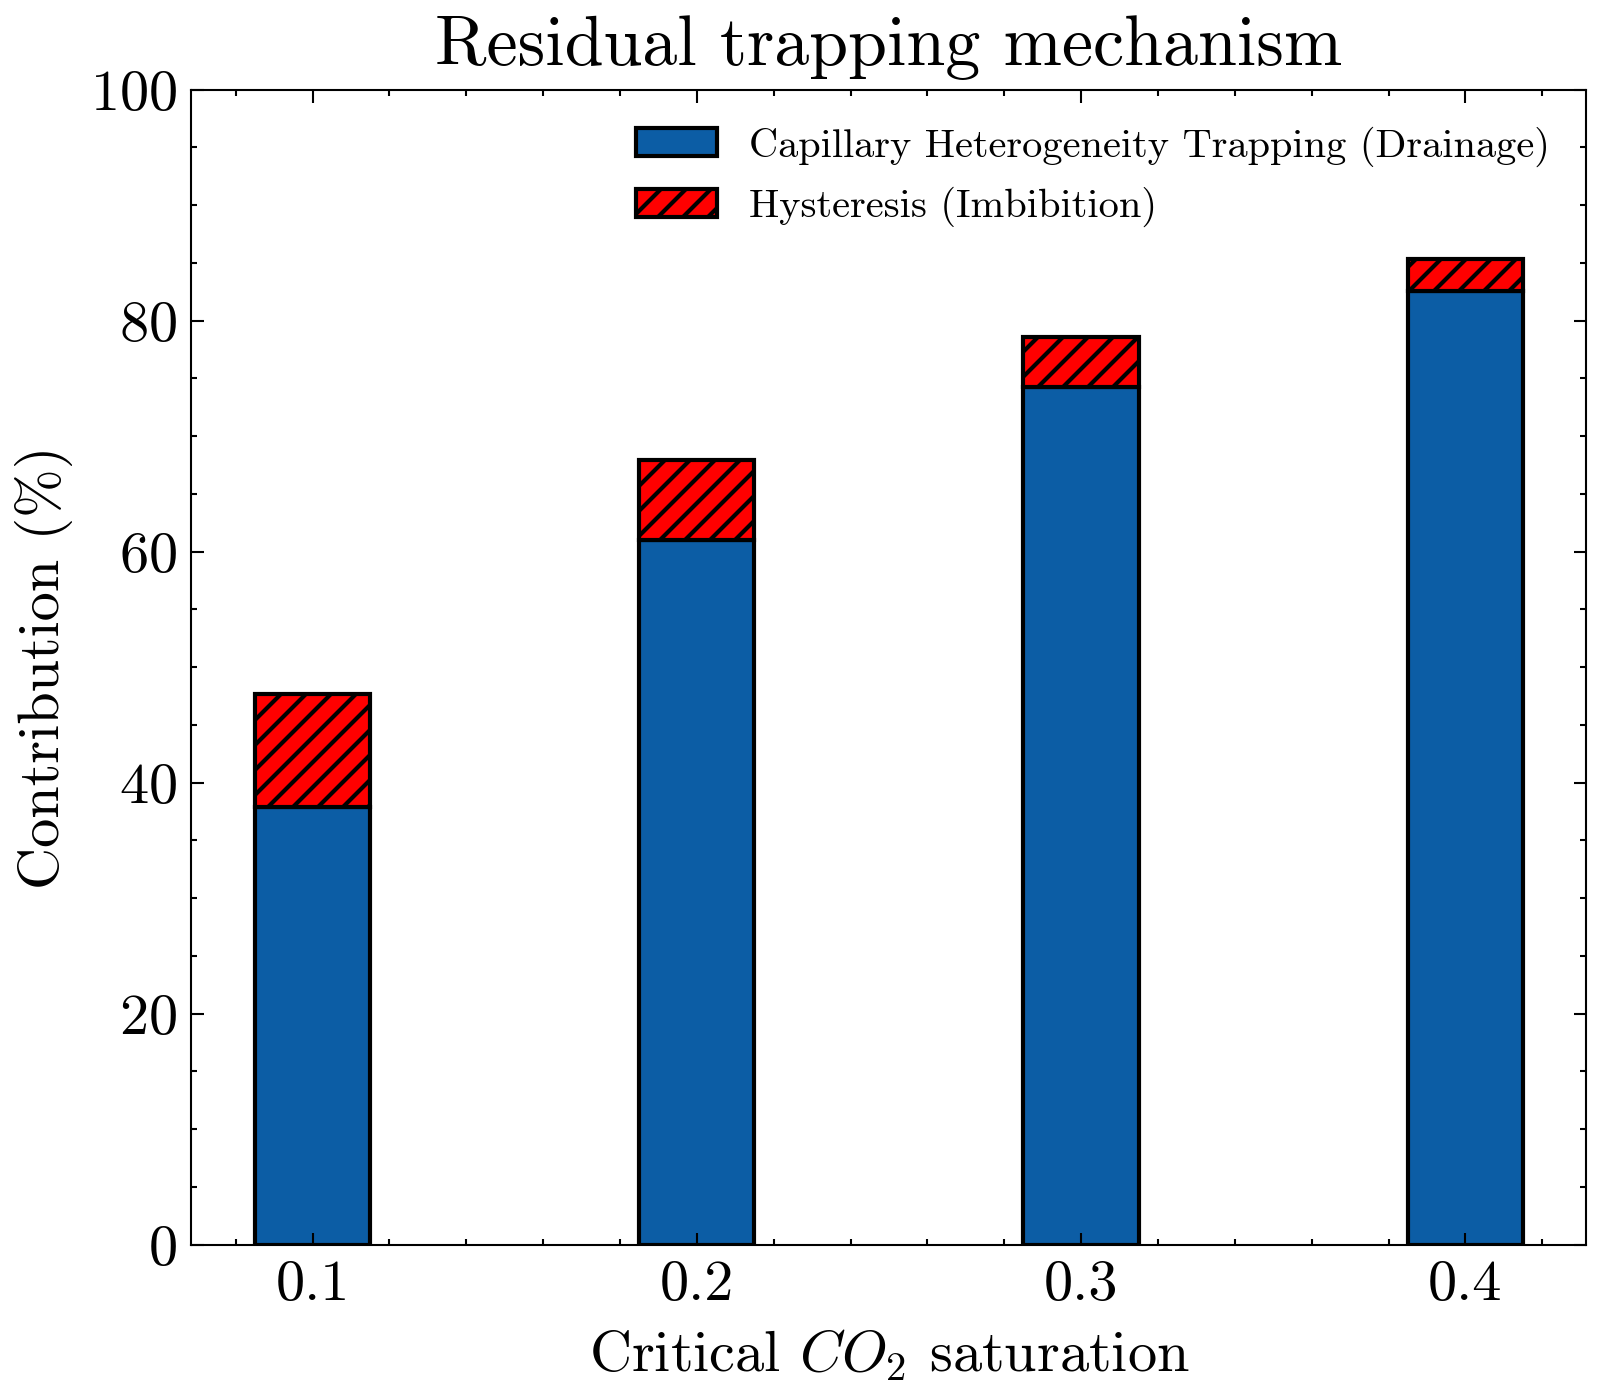

In [14]:
# Potential: Contribution of CHT to total residual trapping
fig, ax = plt.subplots(figsize=(6,5),dpi=300)
pos = 1
for j in range(size):
    
    ax.bar(pos,100*idx[f'S{j+1}'][0][-1],width=0.15,color='C0',edgecolor='black',label='Capillary Heterogeneity Trapping (Drainage)')
    ax.bar(pos,100*(idx_real[f'S{j+1}'][0][-1] - idx[f'S{j+1}'][0][-1]),width=0.15,color='red',
           edgecolor='black',bottom=100*idx[f'S{j+1}'][0][-1],hatch='////',label='Hysteresis (Imbibition)')
    pos = pos + 0.5

    
ax.set_title('Residual trapping mechanism')
ax.set_ylabel('Contribution (%)')
ax.set_ylim(0,100)
ax.set_xticks([1,1.5,2,2.5])
ax.set_xticklabels(scenarios)
ax.set_xlabel('Critical $CO_2$ saturation')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(),ncol=1,
            fontsize='x-small',fancybox=True, shadow=True)

plt.show()

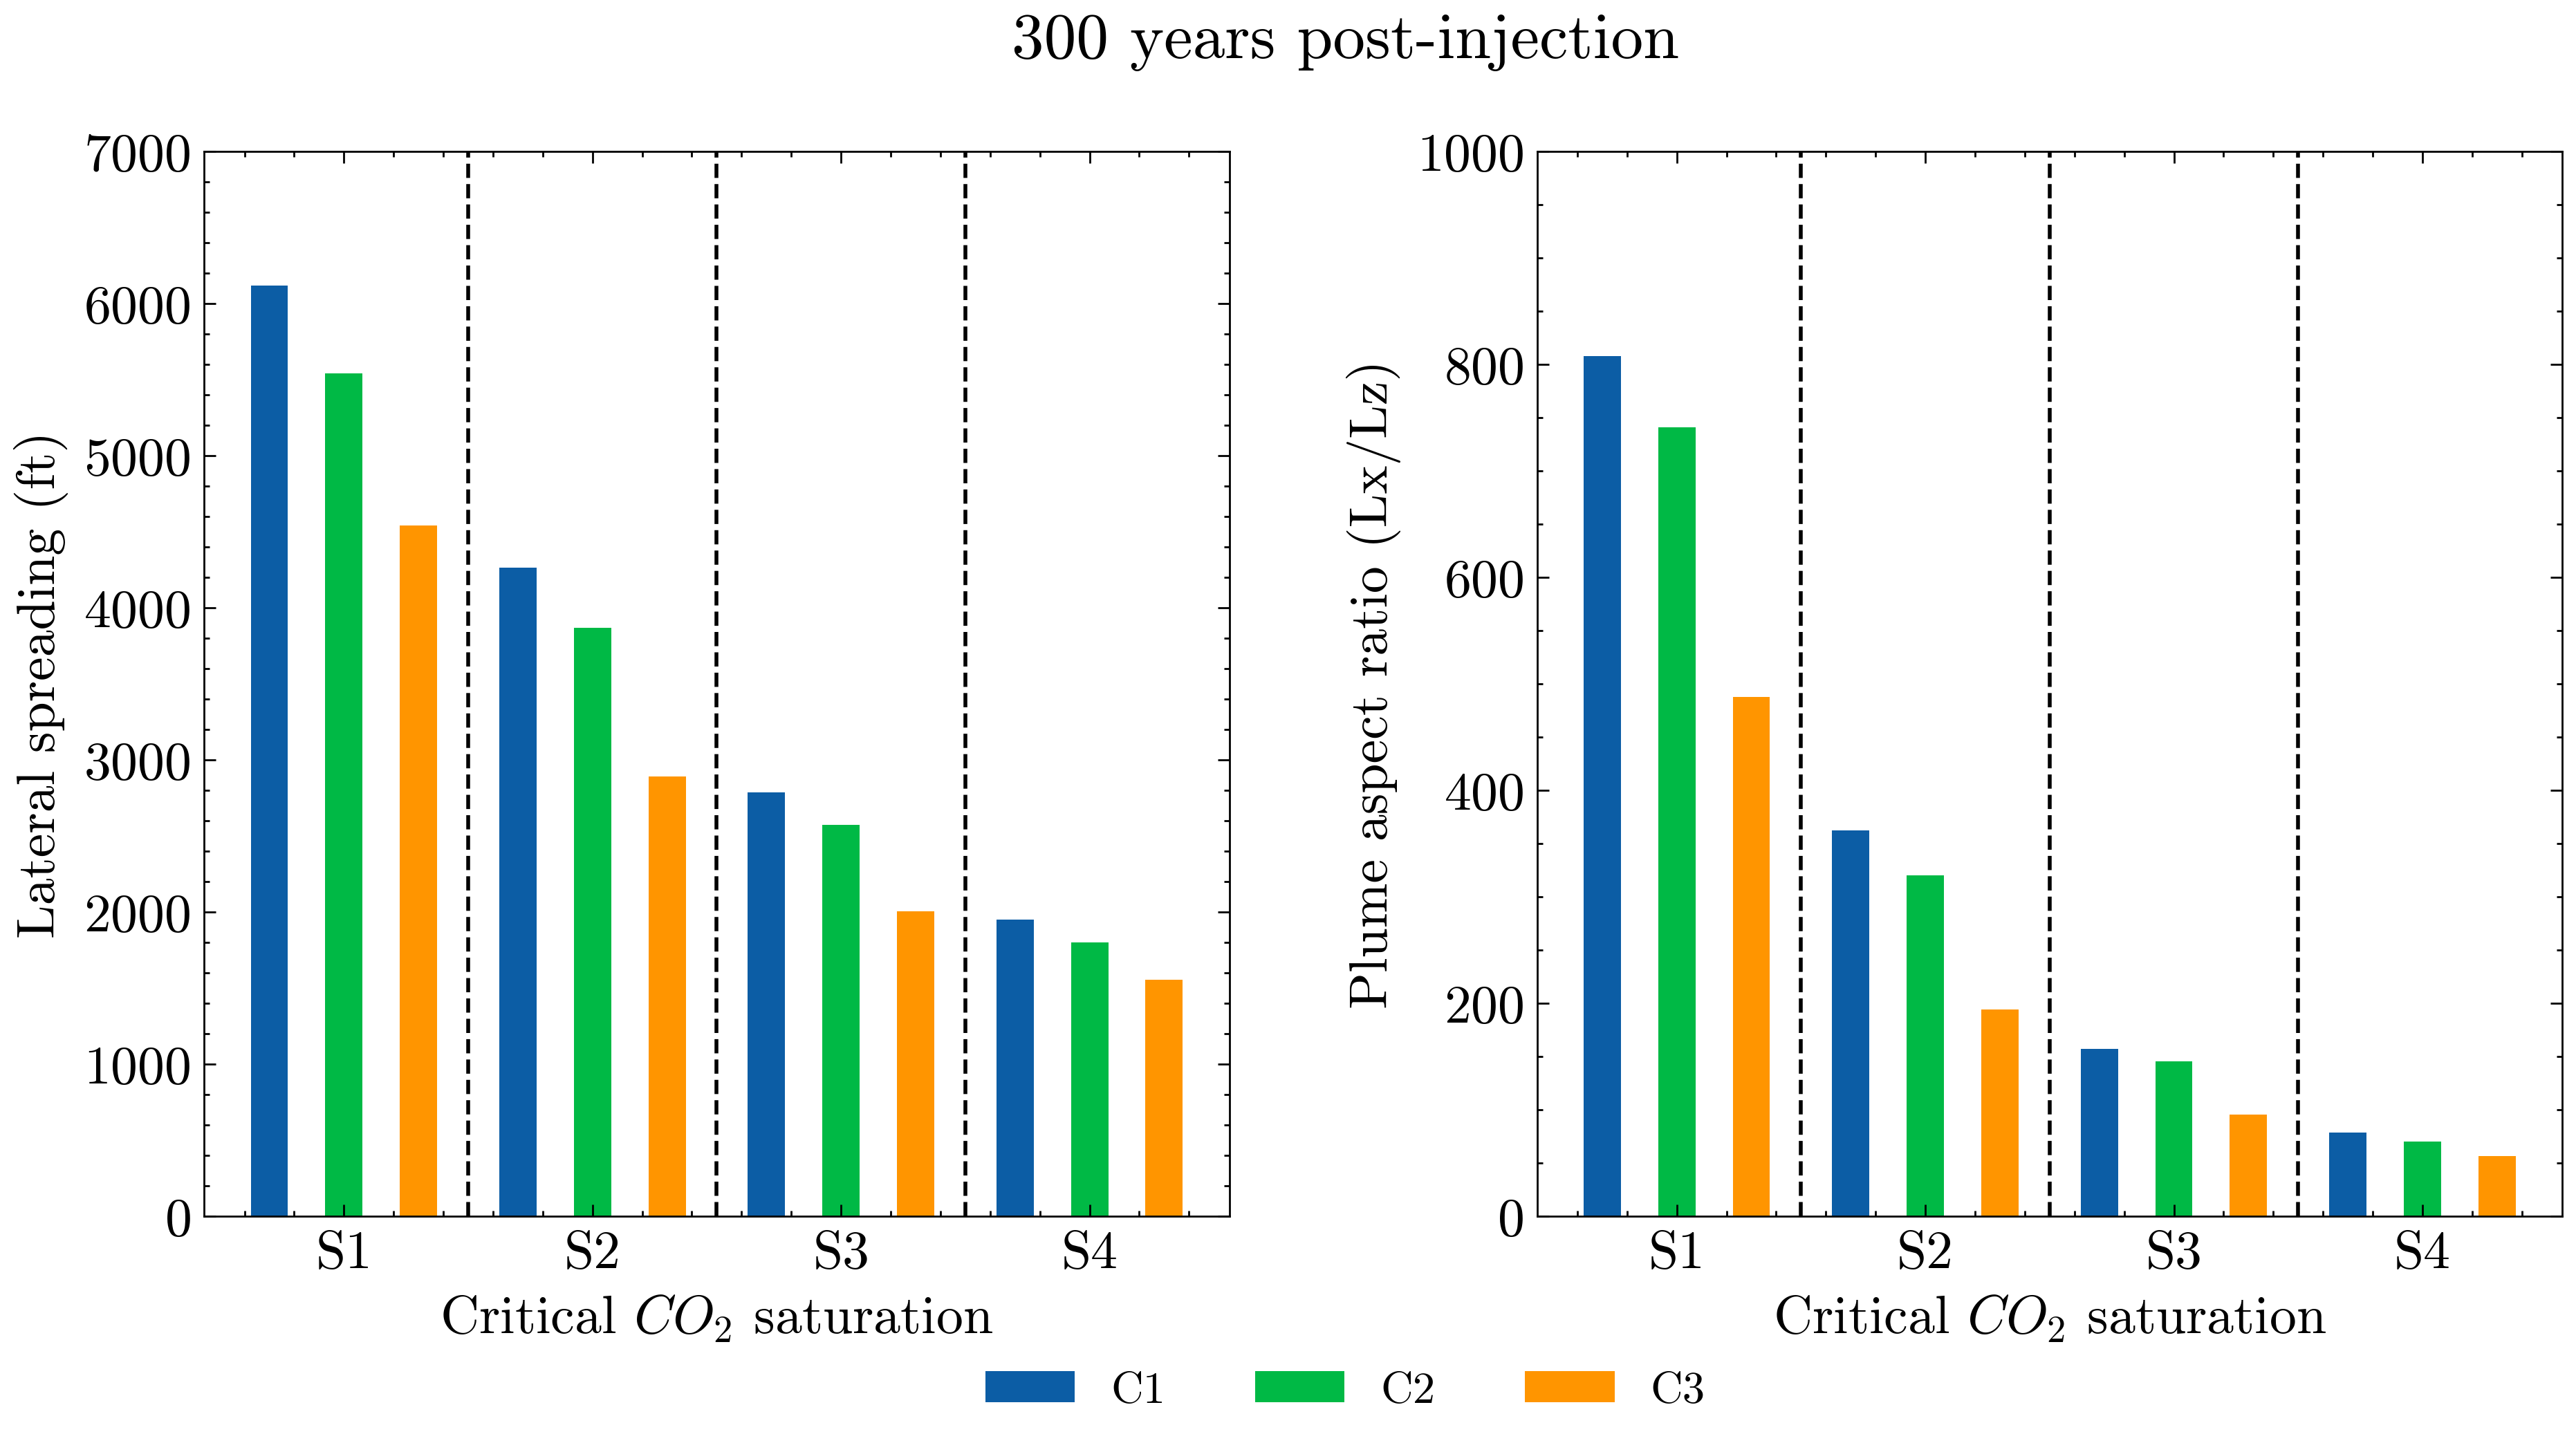

In [20]:
# 5 Lateral displacement and aspect ratio of the plume
# real:mts_4 nod:mts_3 krg:mts_1
labels = ['C1','C2','C3']
fig, ax = plt.subplots(1,2,figsize=(11,5),dpi=400)

for j in range(size):
    ax[0].bar((j+1)-0.3,2*np.sqrt(mts_3[f'S{j+1}'][3][-1]),width=0.15,color='C0',label=labels[0])
    ax[0].bar((j+1),2*np.sqrt(mts_1[f'S{j+1}'][3][-1]),width=0.15,color='C1',label=labels[1])
    ax[0].bar((j+1)+0.3,2*np.sqrt(mts_4[f'S{j+1}'][3][-1]),width=0.15,color='C2',label=labels[2])

    ax[1].bar((j+1)-0.3,mts_3[f'S{j+1}'][3][-1]/mts_3[f'S{j+1}'][4][-1],width=0.15,color='C0',label=labels[0])
    ax[1].bar((j+1),mts_1[f'S{j+1}'][3][-1]/mts_1[f'S{j+1}'][4][-1],width=0.15,color='C1',label=labels[1])
    ax[1].bar((j+1)+0.3,mts_4[f'S{j+1}'][3][-1]/mts_4[f'S{j+1}'][4][-1],width=0.15,color='C2',label=labels[2])
    
ax[0].set_xticks(np.arange(1,5,1))
ax[0].set_xticklabels(scenarios)
ax[0].set_xlabel('Critical $CO_2$ saturation')
ax[0].set_ylabel('Lateral spreading (ft)')
ax[0].set_ylim(0,7000)

ax[1].set_xticks(np.arange(1,5,1))
ax[1].set_xticklabels(scenarios)
ax[1].set_xlabel('Critical $CO_2$ saturation')
ax[1].set_ylabel('Plume aspect ratio (Lx/Lz)')
ax[1].set_ylim(0,1000)

for a in ax:
    a.vlines(1.5,0,7000,linestyle='dashed',color='black')
    a.vlines(2.5,0,7000,linestyle='dashed',color='black')
    a.vlines(3.5,0,7000,linestyle='dashed',color='black')

handles, labels = ax[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))

fig.legend(by_label.values(), by_label.keys(), loc='lower center',ncol=3,
            fontsize='small',bbox_to_anchor=(0.5,-0.06),fancybox=True, shadow=True)
fig.suptitle('300 years post-injection')
plt.subplots_adjust(wspace=0.3)
plt.show()

# Comparison between all set of simulations
 - Average plume saturation (2030, 2130, 2330)
 - Residual trapping index (2330)
 - Lateral and vertical spreading (2330)

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (4).

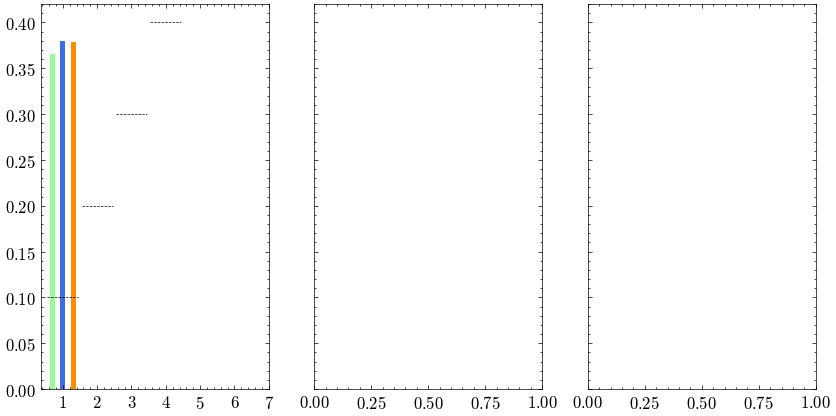

In [29]:


dates= ['2030','2130','2330']
date_idx = [1,4,7]
krg_dict = {}
nod_dict = {}
nokrg_dict = {}

# Compute average saturation 
for j in range(size):
    gaskrg_copy = gas_dict_krg[f'S{j+1}'].copy()
    gaskrg_copy[gaskrg_copy < 0.0001] = np.nan
    gasnod_copy = gas_dict_nod[f'S{j+1}'].copy()
    gasnod_copy[gasnod_copy < 0.0001] = np.nan
    gasnokrg_copy = gas_dict[f'S{j+1}'].copy()
    gasnokrg_copy[gasnokrg_copy < 0.0001] = np.nan

    avgkrg_sat = np.nanmean(gaskrg_copy,axis=(0,1))
    avgnod_sat = np.nanmean(gasnod_copy,axis=(0,1))
    avgnokrg_sat = np.nanmean(gasnokrg_copy,axis=(0,1))

    krg_dict[f'S{j+1}'] = avgkrg_sat
    nod_dict[f'S{j+1}'] = avgnod_sat
    nokrg_dict[f'S{j+1}'] = avgnokrg_sat


fig, ax = plt.subplots(1,3,figsize=(10,5),sharey=True)

for i in date_idx:
    for j in range(size):
        ax[date_idx.index(i)].bar((j+1)-0.3,nod_dict[f'S{j+1}'][i],width=0.15,color=colors[2],label=labels[0])
        ax[date_idx.index(i)].bar((j+1),nokrg_dict[f'S{j+1}'][i],width=0.15,color=colors[0],label=labels[1])
        ax[date_idx.index(i)].bar((j+1)+0.3,krg_dict[f'S{j+1}'][i],width=0.15,color=colors[1],label=labels[2])
        for b in scrit:
            ax[date_idx.index(i)].hlines(b,scrit.tolist().index(b)+0.55,scrit.tolist().index(b)+1.45,linestyles='dashed',colors='black',linewidth=0.5)
        ax[date_idx.index(i)].set_xticks(np.arange(1,8,1))
        ax[date_idx.index(i)].set_xticklabels(scenarios)
        ax[date_idx.index(i)].set_xlabel('Scenario')
        ax[date_idx.index(i)].set_title(dates[date_idx.index(i)])

handles, labels = ax[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))

fig.legend(by_label.values(), by_label.keys(), loc='lower center',ncol=3,
            fontsize='small',bbox_to_anchor=(0.5, 0.95),fancybox=True, shadow=True)

ax[0].text(6.5,0.72,'Scrit',rotation=0,fontsize=8)
ax[1].text(6.5,0.72,'Scrit',rotation=0,fontsize=8)
ax[2].text(6.5,0.72,'Scrit',rotation=0,fontsize=8)

ax[0].set_ylabel('Average gas saturation')
ax[0].set_yticks(np.arange(0,1.1,0.1))
ax[0].set_ylim(0,1)


plt.show()


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (4).

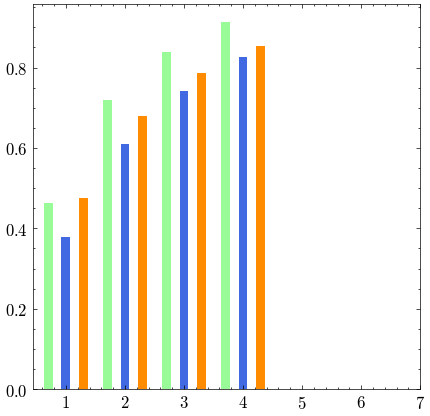

AttributeError: module 'batch_data_processing' has no attribute 'moments'

In [31]:
xc,zc,satc = bdp.count_grid_cells(gas_dict)
xkrg,zkrg, satkrg = bdp.count_grid_cells(gas_dict_krg)
xnokrg,znokrg,satnokrg = bdp.count_grid_cells(gas_dict_nod)


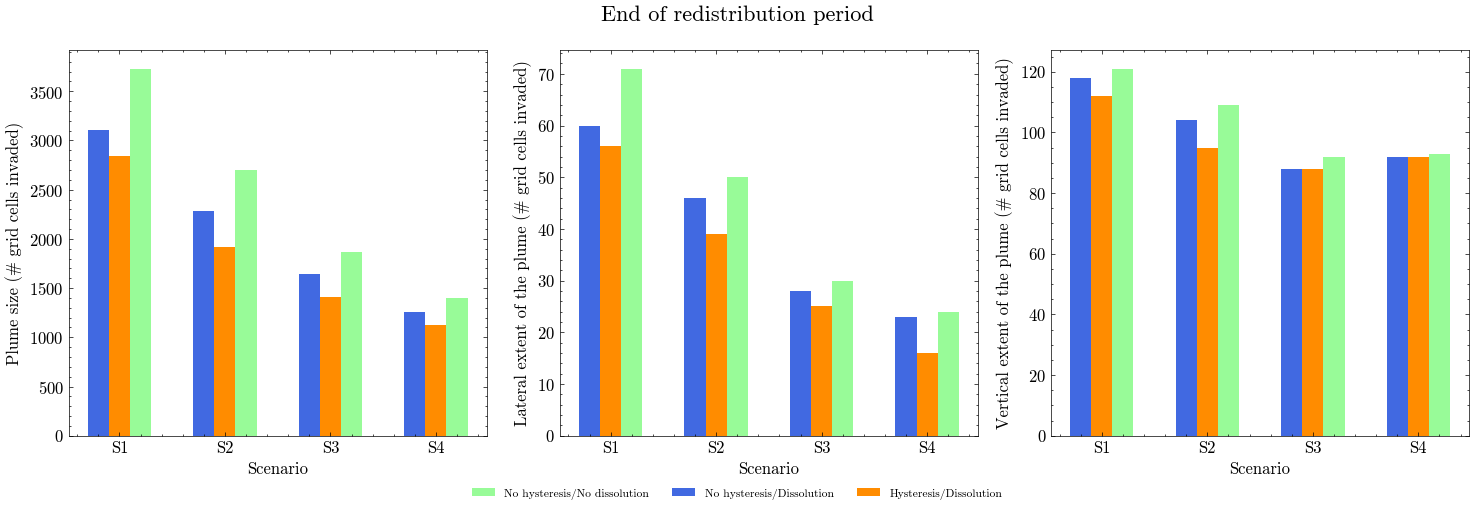

In [32]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
steps = np.arange(1,5,1)

ax[0].bar(steps+0.2,height=satnokrg.values(),width=0.2,color=colors[2],label=labels[0])
ax[0].bar(steps-0.2,height=satc.values(),width=0.2,color=colors[0],label=labels[1])
ax[0].bar(steps,height=satkrg.values(),width=0.2,color=colors[1],label=labels[2])

ax[1].bar(steps+0.2,height=xnokrg.values(),width=0.2,color=colors[2],label=labels[0])
ax[1].bar(steps-0.2,height=xc.values(),width=0.2,color=colors[0],label=labels[1])
ax[1].bar(steps,height=xkrg.values(),width=0.2,color=colors[1],label=labels[2])

ax[2].bar(steps+0.2,height=znokrg.values(),width=0.2,color=colors[2],label=labels[0])
ax[2].bar(steps-0.2,height=zc.values(),width=0.2,color=colors[0],label=labels[1])
ax[2].bar(steps,height=zkrg.values(),width=0.2,color=colors[1],label=labels[2])

for i in ax:
    i.set_xticks(steps)
    i.set_xticklabels(scenarios)
    i.set_xlabel('Scenario')

ax[0].set_ylabel('Plume size (# grid cells invaded)')
ax[1].set_ylabel('Lateral extent of the plume (# grid cells invaded)')
ax[2].set_ylabel('Vertical extent of the plume (# grid cells invaded)')

fig.suptitle('End of redistribution period',fontsize=16)

handles, labels = ax[0].get_legend_handles_labels()

fig.legend(handles=handles, labels = labels, loc='lower center',ncol=3,
            fontsize='x-small',bbox_to_anchor=(0.5,-0.03),fancybox=True, shadow=True)

fig.tight_layout()
plt.show()


## Comparison between nohyst/hys in cap pressure

In [ ]:
labels = ['Non hysteretic capillary pressure','Hysteretic capillary pressure']
colors = ['royalblue','darkorange','palegreen']
dates= ['2030','2130','2330']
date_idx = [1,4,7]
krg_dict = {}
real_dict = {}
size = 4
# Compute average saturation 
for j in range(size):
    gaskrg_copy = gas_dict_krg[f'S{j+1}'].copy()
    gaskrg_copy[gaskrg_copy < 0.0001] = np.nan
    gasreal_copy = gas_dict_real[f'S{j+1}'].copy()
    gasreal_copy[gasreal_copy < 0.0001] = np.nan

    avgkrg_sat = np.nanmean(gaskrg_copy,axis=(0,1))
    avgreal_sat = np.nanmean(gasreal_copy,axis=(0,1))

    krg_dict[f'S{j+1}'] = avgkrg_sat
    real_dict[f'S{j+1}'] = avgreal_sat

fig, ax = plt.subplots(1,3,figsize=(10,5),sharey=True)

for i in date_idx:
    for j in range(size):
        ax[date_idx.index(i)].bar((j+1)-0.3,krg_dict[f'S{j+1}'][i],width=0.15,color=colors[2],label=labels[0])
        ax[date_idx.index(i)].bar((j+1),real_dict[f'S{j+1}'][i],width=0.15,color=colors[0],label=labels[1])
        for b in scrit:
            ax[date_idx.index(i)].hlines(b,scrit.tolist().index(b)+0.35,scrit.tolist().index(b)+1.3,linestyles='dashed',colors='black',linewidth=0.5)
        ax[date_idx.index(i)].set_xticks(np.arange(1,5,1))
        ax[date_idx.index(i)].set_xticklabels(scenarios)
        ax[date_idx.index(i)].set_xlabel('Scenario')
        ax[date_idx.index(i)].set_title(dates[date_idx.index(i)])

handles, labels = ax[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))

fig.legend(by_label.values(), by_label.keys(), loc='lower center',ncol=3,
            fontsize='small',bbox_to_anchor=(0.5, 0.95),fancybox=True, shadow=True)

ax[0].text(3.5,0.5,'Scrit',rotation=0,fontsize=8)
ax[1].text(3.5,0.5,'Scrit',rotation=0,fontsize=8)
ax[2].text(3.5,0.5,'Scrit',rotation=0,fontsize=8)

ax[0].set_ylabel('Average gas saturation')
ax[0].set_yticks(np.arange(0,1.1,0.1))
ax[0].set_ylim(0,1)


plt.show()


In [ ]:
# Compare residual trapping index in all scenarios
idx_krg = {}
idx_real = {}

for j in range(size):
    idx_krg[f'S{j+1}'] = bdp.indexes(special_dict_krg[f'S{j+1}']['Dissolved'],special_dict_krg[f'S{j+1}']['Trapped'],special_dict_krg[f'S{j+1}']['Super-critical'],4.83e9)
    idx_real[f'S{j+1}'] = bdp.indexes(special_dict_real[f'S{j+1}']['Dissolved'],special_dict_real[f'S{j+1}']['Trapped'],special_dict_real[f'S{j+1}']['Super-critical'],4.83e9)

fig, ax = plt.subplots(figsize=(5,5))

for j in range(size):
    ax.bar((j+1)-0.2,idx_krg[f'S{j+1}'][0][-1],width=0.15,color=colors[2],label=labels[0])
    ax.bar((j+1),idx_real[f'S{j+1}'][0][-1],width=0.15,color=colors[0],label=labels[1])

ax.set_xticks(np.arange(1,5,1))
ax.set_xticklabels(scenarios)
ax.set_xlabel('Scenario')
ax.set_ylabel('Residual trapping index')
ax.set_ylim(0,1)
ax.set_title('End of redistribution')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

fig.legend(by_label.values(), by_label.keys(), loc='center right',ncol=1,
            fontsize='x-small',bbox_to_anchor=(0.6,0.86),fancybox=True, shadow=True)

plt.tight_layout()
plt.show()


In [ ]:
# Saturation and plume extent
res = {key: gas_dict_krg[key] for key in gas_dict_krg.keys()
       & {'S1','S2','S3','S4'}}
res = dict(sorted(res.items()))
xreal,zreal,satreal = count_grid_cells(gas_dict_real)
xkrg,zkrg, satkrg = count_grid_cells(res)

fig, ax = plt.subplots(1,3, figsize=(15,5))
steps = np.arange(1,5,1)

ax[0].bar(steps-0.2,height=satkrg.values(),width=0.2,color=colors[2],label=labels[0])
ax[0].bar(steps,height=satreal.values(),width=0.2,color=colors[0],label=labels[1])

ax[1].bar(steps-0.2,height=xkrg.values(),width=0.2,color=colors[2],label=labels[0])
ax[1].bar(steps,height=xreal.values(),width=0.2,color=colors[0],label=labels[1])

ax[2].bar(steps-0.2,height=zkrg.values(),width=0.2,color=colors[2],label=labels[0])
ax[2].bar(steps,height=zreal.values(),width=0.2,color=colors[0],label=labels[1])

for i in ax:
    i.set_xticks(steps)
    i.set_xticklabels(scenarios)
    i.set_xlabel('Scenario')

ax[0].set_ylabel('Plume size (# grid cells invaded)')
ax[1].set_ylabel('Lateral extent of the plume (# grid cells invaded)')
ax[2].set_ylabel('Vertical extent of the plume (# grid cells invaded)')

fig.suptitle('End of redistribution period',fontsize=16)

handles, labels = ax[0].get_legend_handles_labels()

fig.legend(handles=handles, labels = labels, loc='lower center',ncol=3,
            fontsize='x-small',bbox_to_anchor=(0.5,-0.03),fancybox=True, shadow=True)

fig.tight_layout()
plt.show()

## Three scenarios comparison with hysteretic capillary pressure curves

In [ ]:
labels = ['No hysteresis/No dissolution','No hysteresis/Dissolution','Hysteresis/Dissolution']
scenarios = ['S1','S2','S3','S4']
colors = ['royalblue','darkorange','palegreen']
dates= ['2030','2130','2330']
date_idx = [1,4,7]
krg_dict = {}
real_dict = {}
size = 4
# Compare residual trapping index in all scenarios
idx_krg = {}
idx_nod = {}
idx_nokrg = {}

for j in range(size):
    idx_krg[f'S{j+1}'] = bdp.indexes(special_dict_real[f'S{j+1}']['Dissolved'],special_dict_real[f'S{j+1}']['Trapped'],special_dict_real[f'S{j+1}']['Super-critical'],4.83e9)
    idx_nod[f'S{j+1}'] = bdp.indexes(special_dict_nod[f'S{j+1}']['Dissolved'],special_dict_nod[f'S{j+1}']['Trapped'],special_dict_nod[f'S{j+1}']['Super-critical'],4.83e9)
    idx_nokrg[f'S{j+1}'] = bdp.indexes(special_dict[f'S{j+1}']['Dissolved'],special_dict[f'S{j+1}']['Trapped'],special_dict[f'S{j+1}']['Super-critical'],4.83e9)

fig, ax = plt.subplots(1,2,figsize=(10,5),sharex=True)

for j in range(size):
    ax[0].bar((j+1)-0.3,idx_nod[f'S{j+1}'][0][-1],width=0.15,color=colors[2],label=labels[0])
    ax[0].bar((j+1),idx_nokrg[f'S{j+1}'][0][-1],width=0.15,color=colors[0],label=labels[1])
    ax[0].bar((j+1)+0.3,idx_krg[f'S{j+1}'][0][-1],width=0.15,color=colors[1],label=labels[2])

    ax[1].bar((j+1)-0.3,idx_nod[f'S{j+1}'][1][-1],width=0.15,color=colors[2],label=labels[0])
    ax[1].bar((j+1),idx_nokrg[f'S{j+1}'][1][-1],width=0.15,color=colors[0],label=labels[1])
    ax[1].bar((j+1)+0.3,idx_krg[f'S{j+1}'][1][-1],width=0.15,color=colors[1],label=labels[2])

ax[0].set_xticks(np.arange(1,5,1))
ax[0].set_xticklabels(scenarios)
ax[0].set_xlabel('Scenario')
ax[0].set_ylabel('Residual trapping index')
ax[1].set_ylabel('Solubility trapping index')


handles0, labels0 = ax[0].get_legend_handles_labels()
by_label0 = dict(zip(labels0, handles0))

fig.legend(by_label0.values(), by_label0.keys(), loc='upper center',ncol=3,
            fontsize='x-small',fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

In [ ]:
nod = {key: gas_dict_nod[key] for key in gas_dict_krg.keys()
       & {'S1','S2','S3','S4'}}
nod = dict(sorted(nod.items()))
nohys = {key: gas_dict[key] for key in gas_dict_krg.keys()
       & {'S1','S2','S3','S4'}}
nohys = dict(sorted(nohys.items()))

xreal,zreal,satreal = count_grid_cells(gas_dict_real)
xnohys,znohys, satnohys = count_grid_cells(nohys)
xnod,znod, satnod = count_grid_cells(nod)

fig, ax = plt.subplots(1,3, figsize=(15,5))
steps = np.arange(1,5,1)

ax[0].bar(steps-0.2,height=satnod.values(),width=0.2,color=colors[2],label=labels[0])
ax[0].bar(steps,height=satnohys.values(),width=0.2,color=colors[0],label=labels[1])
ax[0].bar(steps+0.2,height=satreal.values(),width=0.2,color=colors[1],label=labels[2])

ax[1].bar(steps-0.2,height=xnod.values(),width=0.2,color=colors[2],label=labels[0])
ax[1].bar(steps,height=xnohys.values(),width=0.2,color=colors[0],label=labels[1])
ax[1].bar(steps+0.2,height=xreal.values(),width=0.2,color=colors[1],label=labels[2])

ax[2].bar(steps-0.2,height=znod.values(),width=0.2,color=colors[2],label=labels[0])
ax[2].bar(steps,height=znohys.values(),width=0.2,color=colors[0],label=labels[1])
ax[2].bar(steps+0.2,height=zreal.values(),width=0.2,color=colors[1],label=labels[2])

for i in ax:
    i.set_xticks(steps)
    i.set_xticklabels(scenarios)
    i.set_xlabel('Scenario')

ax[0].set_ylabel('Plume size (# grid cells invaded)')
ax[1].set_ylabel('Lateral extent of the plume (# grid cells invaded)')
ax[2].set_ylabel('Vertical extent of the plume (# grid cells invaded)')


handles, labels = ax[0].get_legend_handles_labels()

fig.legend(handles=handles, labels = labels, loc='upper center',ncol=3,
            fontsize='x-small',fancybox=True, shadow=True)


plt.show()
